# P04_02_tf




tensorflow approach for ts is applied.
https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en

In [1]:
section_fig_main_title = 'P04_02_tf_'




In [2]:
!jupyter kernelspec list

Available kernels:
  env          /Users/amin/Library/Jupyter/kernels/env
  julia-1.6    /Users/amin/Library/Jupyter/kernels/julia-1.6
  python3      /Users/amin/Library/Jupyter/kernels/python3


In [3]:
# import os
# print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
# print("PATH:", os.environ.get('PATH'))

In [43]:
# !pip install seaborn
import json

In [5]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
!which pip

/Library/Frameworks/Python.framework/Versions/3.7/bin/pip


In [7]:
!which python

/Users/amin/miniconda3/bin/python


In [8]:
import sys
print(sys.executable)


/Users/amin/Desktop/proj/env/bin/python


In [9]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_error
# from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install numpy

In [10]:
from sklearn.metrics import r2_score,mean_absolute_error

In [11]:
# !/Users/amin/anaconda3/bin/python -m pip install --upgrade tensorflow 
# pip install --upgrade tensorflow 

In [12]:

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [15]:
from pandas.plotting import autocorrelation_plot
import gif

In [16]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [17]:
import tensorflow as tf
tf.__version__


'2.6.0'

In [18]:
import gif
from tqdm import tqdm

In [19]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data 

Using the univariate evenly spaced time series data from P03_01.

In [20]:
csv_path = "../Data/Data_ICME_Edited_Decoded_out_P02_03.csv"
dataset = pd.read_csv(csv_path, infer_datetime_format=True)

In [21]:
dataset.index = dataset['ICME Plasma/Field Start Y/M/D (UT) (b)']

In [22]:
dataset.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,
1996-05-27 15:00:00,1996-05-27 15:00:00,1996-05-29 03:00:00,1,2,1,370,400,9,3,117,1.375000
1996-07-01 18:00:00,1996-07-01 18:00:00,1996-07-02 11:00:00,1,4,44,360,370,11,3,78,0.583333
1996-08-07 12:00:00,1996-08-07 12:00:00,1996-08-08 10:00:00,1,2,2,350,380,7,3,88,0.791667
1996-12-23 17:00:00,1996-12-23 17:00:00,1996-12-25 11:00:00,1,2,22,360,420,10,3,69,1.625000
1997-01-10 04:00:00,1997-01-10 04:00:00,1997-01-11 02:00:00,3,1,4,450,460,14,3,191,0.791667


In [23]:
dataset.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)', 'BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval'],
      dtype='object')

Following columns are used for multi-var time series modeling.

```BDE? (e)``` : Evidence of BiDirectional suprathermal Electron strahls (BDE) in ACE/SWEPAM Observations

```MC? (l)``` :  magnetic cloud has been reported in association with the ICME 

```V_ICME (km/s) (i)``` : ICME speed



In [24]:
keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)',
             'BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval']

# keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)' ,'BDE? (e)', 'V_ICME (km/s) (i)','MC? (l)']
df = dataset[keep_cols]
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,1996-05-27 15:00:00,1,2,1,370,9,3,117,1.375000
1996-07-01 18:00:00,1996-07-01 18:00:00,1,4,44,360,11,3,78,0.583333
1996-08-07 12:00:00,1996-08-07 12:00:00,1,2,2,350,7,3,88,0.791667
1996-12-23 17:00:00,1996-12-23 17:00:00,1,2,22,360,10,3,69,1.625000
1997-01-10 04:00:00,1997-01-10 04:00:00,3,1,4,450,14,3,191,0.791667


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 1996-05-27 15:00:00 to 2021-05-12 15:00:00
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ICME Plasma/Field Start Y/M/D (UT) (b)  493 non-null    object 
 1   BDE? (e)                                493 non-null    int64  
 2   Qual. (g)                               493 non-null    int64  
 3   dV (km/s) (h)                           493 non-null    int64  
 4   V_ICME (km/s) (i)                       493 non-null    int64  
 5   B (nT) (k)                              493 non-null    int64  
 6   MC? (l)                                 493 non-null    int64  
 7   Dst (nT) (m)                            493 non-null    int64  
 8   Normalized_time_interval                493 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 38.5+ KB


## Make Data evenly spaced time series

In [26]:
# fix the date dtype
df['ICME Plasma/Field Start Y/M/D (UT) (b)']= pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])

In [27]:
df = df.set_index('ICME Plasma/Field Start Y/M/D (UT) (b)').resample('18D').pad()

In [28]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-14,1.0,2.0,1.0,370.0,9.0,3.0,117.0,1.375000
1996-07-02,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-07-20,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-07,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333


In [29]:
df.shape

(507, 8)

In [30]:
# remove first row
df = df.iloc[1: , :]
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-06-14,1.0,2.0,1.0,370.0,9.0,3.0,117.0,1.375000
1996-07-02,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-07-20,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-07,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-25,1.0,2.0,2.0,350.0,7.0,3.0,88.0,0.791667


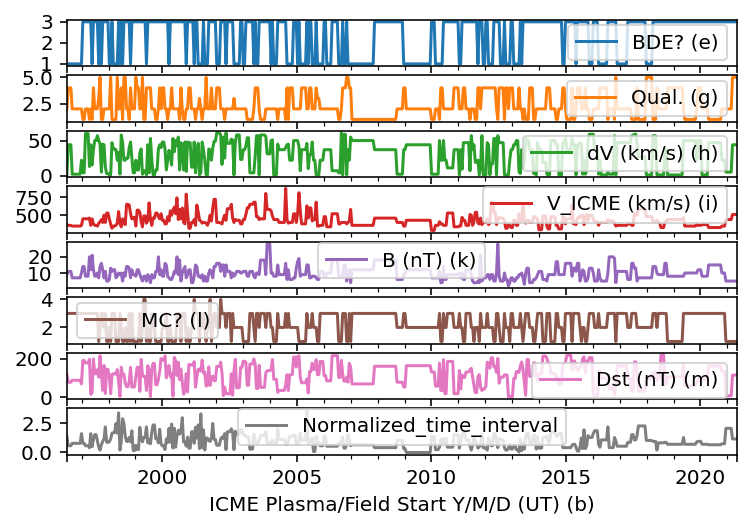

In [31]:
plot_cols = df.columns
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

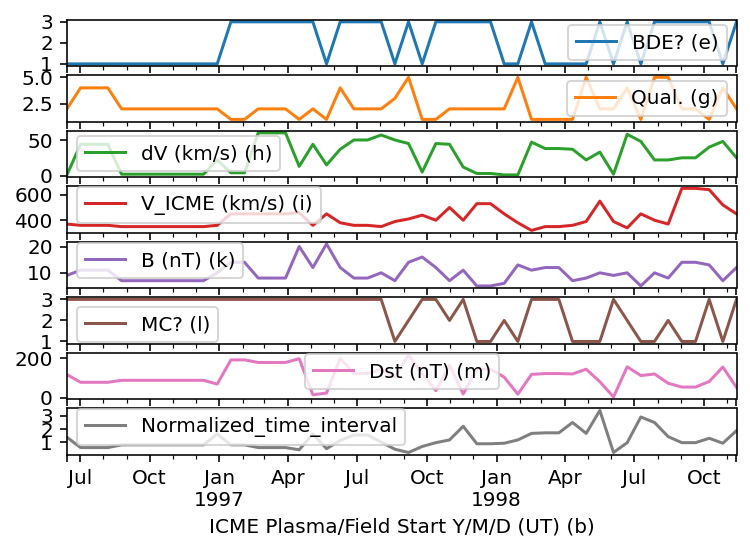

In [32]:
plot_features = df[plot_cols][:50]
plot_features.index = df[:50].index
_ = plot_features.plot(subplots=True)

## Inspect and cleanup

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BDE? (e),506.0,2.300395,0.954759,1.0,1.000000,3.000000,3.000000,3.000
Qual. (g),506.0,2.308300,1.187313,1.0,1.000000,2.000000,4.000000,5.000
dV (km/s) (h),506.0,30.110672,20.192431,1.0,7.000000,37.000000,47.000000,61.000
V_ICME (km/s) (i),506.0,435.691700,89.661717,290.0,360.000000,430.000000,470.000000,870.000
B (nT) (k),506.0,10.193676,4.200665,2.0,7.000000,9.000000,12.000000,28.000
MC? (l),506.0,2.258893,0.812142,1.0,2.000000,2.000000,3.000000,4.000
Dst (nT) (m),506.0,115.468379,57.169299,1.0,69.000000,116.000000,163.000000,220.000
Normalized_time_interval,506.0,0.962204,0.601716,0.0,0.541667,0.833333,1.291667,3.625


all mean and max values are in range (no 999 or -999 is observed)

## Fast Fourier Transform

To check for any frequncy in data apply the FFT as follow.

2021-10-29 11:30:35.961515: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


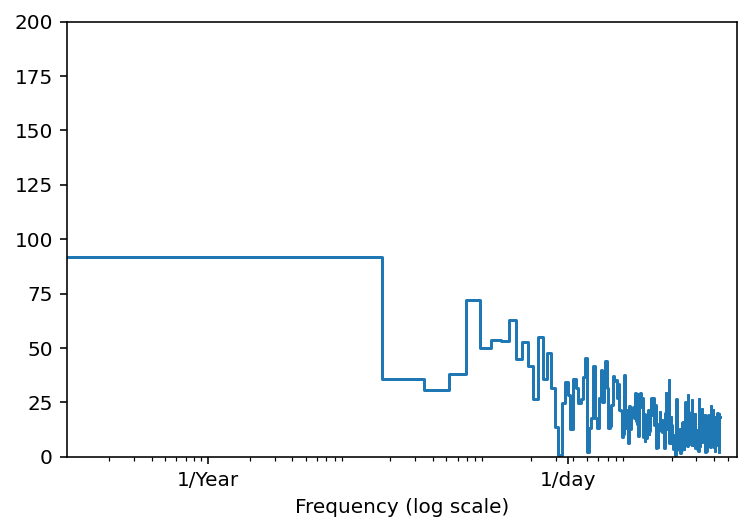

In [34]:
col = 'BDE? (e)'


fft = tf.signal.rfft(df[col])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[col])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 200)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

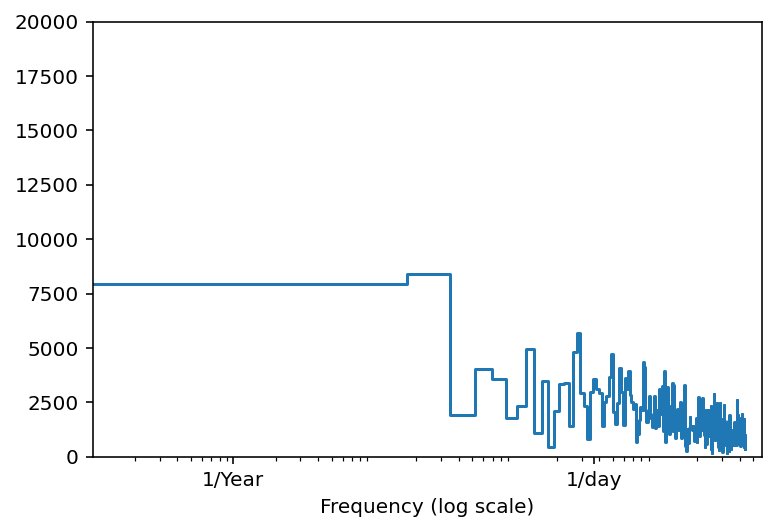

In [35]:
col = 'V_ICME (km/s) (i)'


fft = tf.signal.rfft(df[col])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[col])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 20000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

no frequency was observed.

In [36]:
df.columns

Index(['BDE? (e)', 'Qual. (g)', 'dV (km/s) (h)', 'V_ICME (km/s) (i)',
       'B (nT) (k)', 'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval'],
      dtype='object')

call the coded values from the data folder and decode the numerical values made at the EDA part of project.

In [47]:
with open("../Data/save_coded_values_P02_03_EDA.json", 'r') as f:
    coded_vals = json.load(f)

print(coded_vals)

[{'BDE? (e)': {'N': 1, 'SEP': 2, 'Y': 3}}, {'Qual. (g)': {'1': 1, '2': 2, '2W': 3, '3': 4, '3W': 5}}, {'dV (km/s) (h)': {'0': 1, '10': 2, '100': 3, '100 S': 4, '110': 5, '110 S': 6, '120': 7, '120 S': 8, '130': 9, '130 S': 10, '140': 11, '140 S': 12, '150': 13, '150  S': 14, '150 S': 15, '160 S': 16, '170': 17, '170 S': 18, '180': 19, '180 S': 20, '190': 21, '20': 22, '20 S': 23, '200': 24, '200 S': 25, '210 S': 26, '220': 27, '220 S': 28, '230': 29, '230 S': 30, '240 S': 31, '250 S': 32, '250 Wv': 33, '260 S': 34, '270': 35, '280': 36, '30': 37, '30 S': 38, '300  S': 39, '300 S': 40, '320 S': 41, '340 S': 42, '350 S': 43, '40': 44, '40 S': 45, '400 S': 46, '50': 47, '50 S': 48, '550 S': 49, '60': 50, '60 S': 51, '650 S': 52, '70': 53, '70  S': 54, '70 S': 55, '750 S': 56, '80': 57, '80 S': 58, '90': 59, '90  S': 60, '90 S': 61, '900 S': 62}}, {'MC? (l)': {'0': 1, '1': 2, '2': 3, '2H': 4}}, {'Dst (nT) (m)': {'+1': 1, '+16 P': 2, '+9': 3, '-1': 4, '-10': 5, '-10 P': 6, '-10 Q': 7, '-100

# Independent parameters and decoded values:

**Dst:**

Dst index is an index of magnetic activity derived from a network of near-equatorial geomagnetic observatories.
The Dst (Disturbance storm time) index is a measurement of earth geomagnetic activity and is widely used to characterize the geomagnetic storm. [ref](https://ui.adsabs.harvard.edu/abs/2012Ap%26SS.337...23B/abstract)

The minimum value of the geomagnetic Dst index during the period between the disturbance and ICME trailing edge (or slightly thereafter if storm peak is generated by the trailing regions of the ICME). 'P' indicates a "provisional" value, and 'Q' that real time ("quicklook") data from the WDC for Geomagnetism, Kyoto, are used. (Note that quicklook Dst values at the WDC are revised after they are initially posted, so the quoted values for recent ICMEs may be subject to revision.) Otherwise values are "final". See Zhang et al. [2007] for a discussion of the solar and interplanetary drivers of the intense (Dst ≤-100 nT) geomagnetic storms during 1996-2005.


```{'Dst (nT) (m)': {'+1': 1, '+16 P': 2, '+9': 3, '-1': 4, '-10': 5, '-10 P': 6, '-10 Q': 7, '-100': 8, '-101': 9, '-102': 10, '-104': 11, '-104 P': 12, '-105': 13, '-106': 14, '-107': 15, '-108': 16, '-109': 17, '-11': 18, '-110': 19, '-110 P': 20, '-112': 21, '-113': 22, '-114': 23, '-115': 24, '-117': 25, '-118': 26, '-119': 27, '-12': 28, '-122': 29, '-122 Q': 30, '-123': 31, '-124Q': 32, '-127': 33, '-129': 34, '-13': 35, '-130': 36, '-131': 37, '-132': 38, '-133': 39, '-136': 40, '-138': 41, '-139': 42, '-14': 43, '-14 P': 44, '-141': 45, '-143': 46, '-144': 47, '-145': 48, '-146': 49, '-147': 50, '-148': 51, '-149': 52, '-15': 53, '-155': 54, '-155 P': 55, '-157': 56, '-159': 57, '-16': 58, '-16 Q': 59, '-162': 60, '-166': 61, '-17': 62, '-17 P': 63, '-170': 64, '-173': 65, '-174 Q': 66, '-176': 67, '-17Q': 68, '-18': 69, '-181': 70, '-182': 71, '-187': 72, '-19': 73, '-19 Q': 74, '-2': 75, '-2 P': 76, '-2 Q': 77, '-20': 78, '-201': 79, '-204 P': 80, '-205': 81, '-207': 82, '-21': 83, '-21 Q': 84, '-22': 85, '-221': 86, '-223 P': 87, '-23': 88, '-23 P': 89, '-23 Q': 90, '-235': 91, '-237': 92, '-24': 93, '-24 Q': 94, '-247': 95, '-24Q': 96, '-25': 97, '-25 P': 98, '-25 Q': 99, '-26': 100, '-263': 101, '-27': 102, '-271': 103, '-28': 104, '-28 P': 105, '-28 Q': 106, '-288': 107, '-29': 108, '-29 P': 109, '-292': 110, '-3': 111, '-30': 112, '-301': 113, '-31': 114, '-31 Q': 115, '-32': 116, '-33': 117, '-34': 118, '-34 P': 119, '-35': 120, '-353': 121, '-36': 122, '-37': 123, '-374': 124, '-38': 125, '-38 P': 126, '-383': 127, '-387': 128, '-39': 129, '-39 Q': 130, '-4': 131, '-4 P': 132, '-40': 133, '-40 Q': 134, '-41': 135, '-42': 136, '-42 P': 137, '-422': 138, '-43': 139, '-43 P': 140, '-44 P': 141, '-44 Q': 142, '-45': 143, '-46': 144, '-47': 145, '-48': 146, '-48 Q': 147, '-48Q': 148, '-49': 149, '-5': 150, '-50': 151, '-51': 152, '-51 P': 153, '-51 Q': 154, '-52': 155, '-55': 156, '-56': 157, '-57': 158, '-57 P': 159, '-58': 160, '-59': 161, '-59 P': 162, '-59 Q': 163, '-6': 164, '-60': 165, '-60 P': 166, '-61': 167, '-61 P': 168, '-61 Q': 169, '-62': 170, '-62 P': 171, '-63': 172, '-64': 173, '-65': 174, '-65 Q': 175, '-66': 176, '-67': 177, '-68': 178, '-69': 179, '-7': 180, '-7 P': 181, '-71': 182, '-72': 183, '-72Q': 184, '-73': 185, '-74': 186, '-75': 187, '-75 P': 188, '-76': 189, '-77': 190, '-78': 191, '-79': 192, '-8': 193, '-8 P': 194, '-80': 195, '-81': 196, '-82': 197, '-83': 198, '-84': 199, '-84 P': 200, '-85': 201, '-86': 202, '-86 P': 203, '-87': 204, '-88': 205, '-89 P': 206, '-90': 207, '-91': 208, '-92': 209, '-92 P': 210, '-93': 211, '-93 P': 212, '-94 P': 213, '-95': 214, '-97': 215, '-98': 216, '-99': 217, '-99 P': 218, '0': 219, '0 Q': 220, '1 P': 221}}```




**B (nT):**

(k) Mean magnetic field strength in the ICME, based on the interval from (b) to (c), to the nearest 1 nT.

**MC:**

'2' indicates that a magnetic cloud has been reported in association with the ICME (see (d) above) or (occasionally, or for recent events) that by our assessment, the ICME has the clear features of a magnetic cloud but a magnetic cloud may not have been reported. 'H' indicates an event reported by Huttunen et al. Ann Geophys. (2005) 23:1-17 that is not listed by Lepping. '1' indicates that the ICME shows evidence of a rotation in field direction, but lacks some other characteristics of a magnetic cloud, for example an enhanced magnetic field. '0' indicates that the ICME is not a reported magnetic cloud, and lacks most of the typical features of a magnetic cloud, such as a smoothly rotating, enhanced magnetic field.

```{'MC? (l)': {'0': 1, '1': 2, '2': 3, '2H': 4}}, ```

**dv:**

Increase in solar wind speed at the upstream disturbance (shock/wave) estimated from 1 hour averaged solar wind data. 'S' indicates that a forward fast shock has been reported in the ACE List of Disturbances and Transients or Kasper Shock list (including ACE and WIND observations).


```{'dV (km/s) (h)': {'0': 1, '10': 2, '100': 3, '100 S': 4, '110': 5, '110 S': 6, '120': 7, '120 S': 8, '130': 9, '130 S': 10, '140': 11, '140 S': 12, '150': 13, '150  S': 14, '150 S': 15, '160 S': 16, '170': 17, '170 S': 18, '180': 19, '180 S': 20, '190': 21, '20': 22, '20 S': 23, '200': 24, '200 S': 25, '210 S': 26, '220': 27, '220 S': 28, '230': 29, '230 S': 30, '240 S': 31, '250 S': 32, '250 Wv': 33, '260 S': 34, '270': 35, '280': 36, '30': 37, '30 S': 38, '300  S': 39, '300 S': 40, '320 S': 41, '340 S': 42, '350 S': 43, '40': 44, '40 S': 45, '400 S': 46, '50': 47, '50 S': 48, '550 S': 49, '60': 50, '60 S': 51, '650 S': 52, '70': 53, '70  S': 54, '70 S': 55, '750 S': 56, '80': 57, '80 S': 58, '90': 59, '90  S': 60, '90 S': 61, '900 S': 62}}, ```




**Qual:**

The "quality" of the boundary times (`1' indicating the most reliable) based on assessment of the various data sets, including plasma, magnetic field and solar wind composition/charge states. 'W' indicates that the overall ICME signatures are particularly weak.



```'Qual. (g)': {'1': 1, '2': 2, '2W': 3, '3': 4, '3W': 5}```

In [59]:
plt.rcParams["font.size"] = "12"

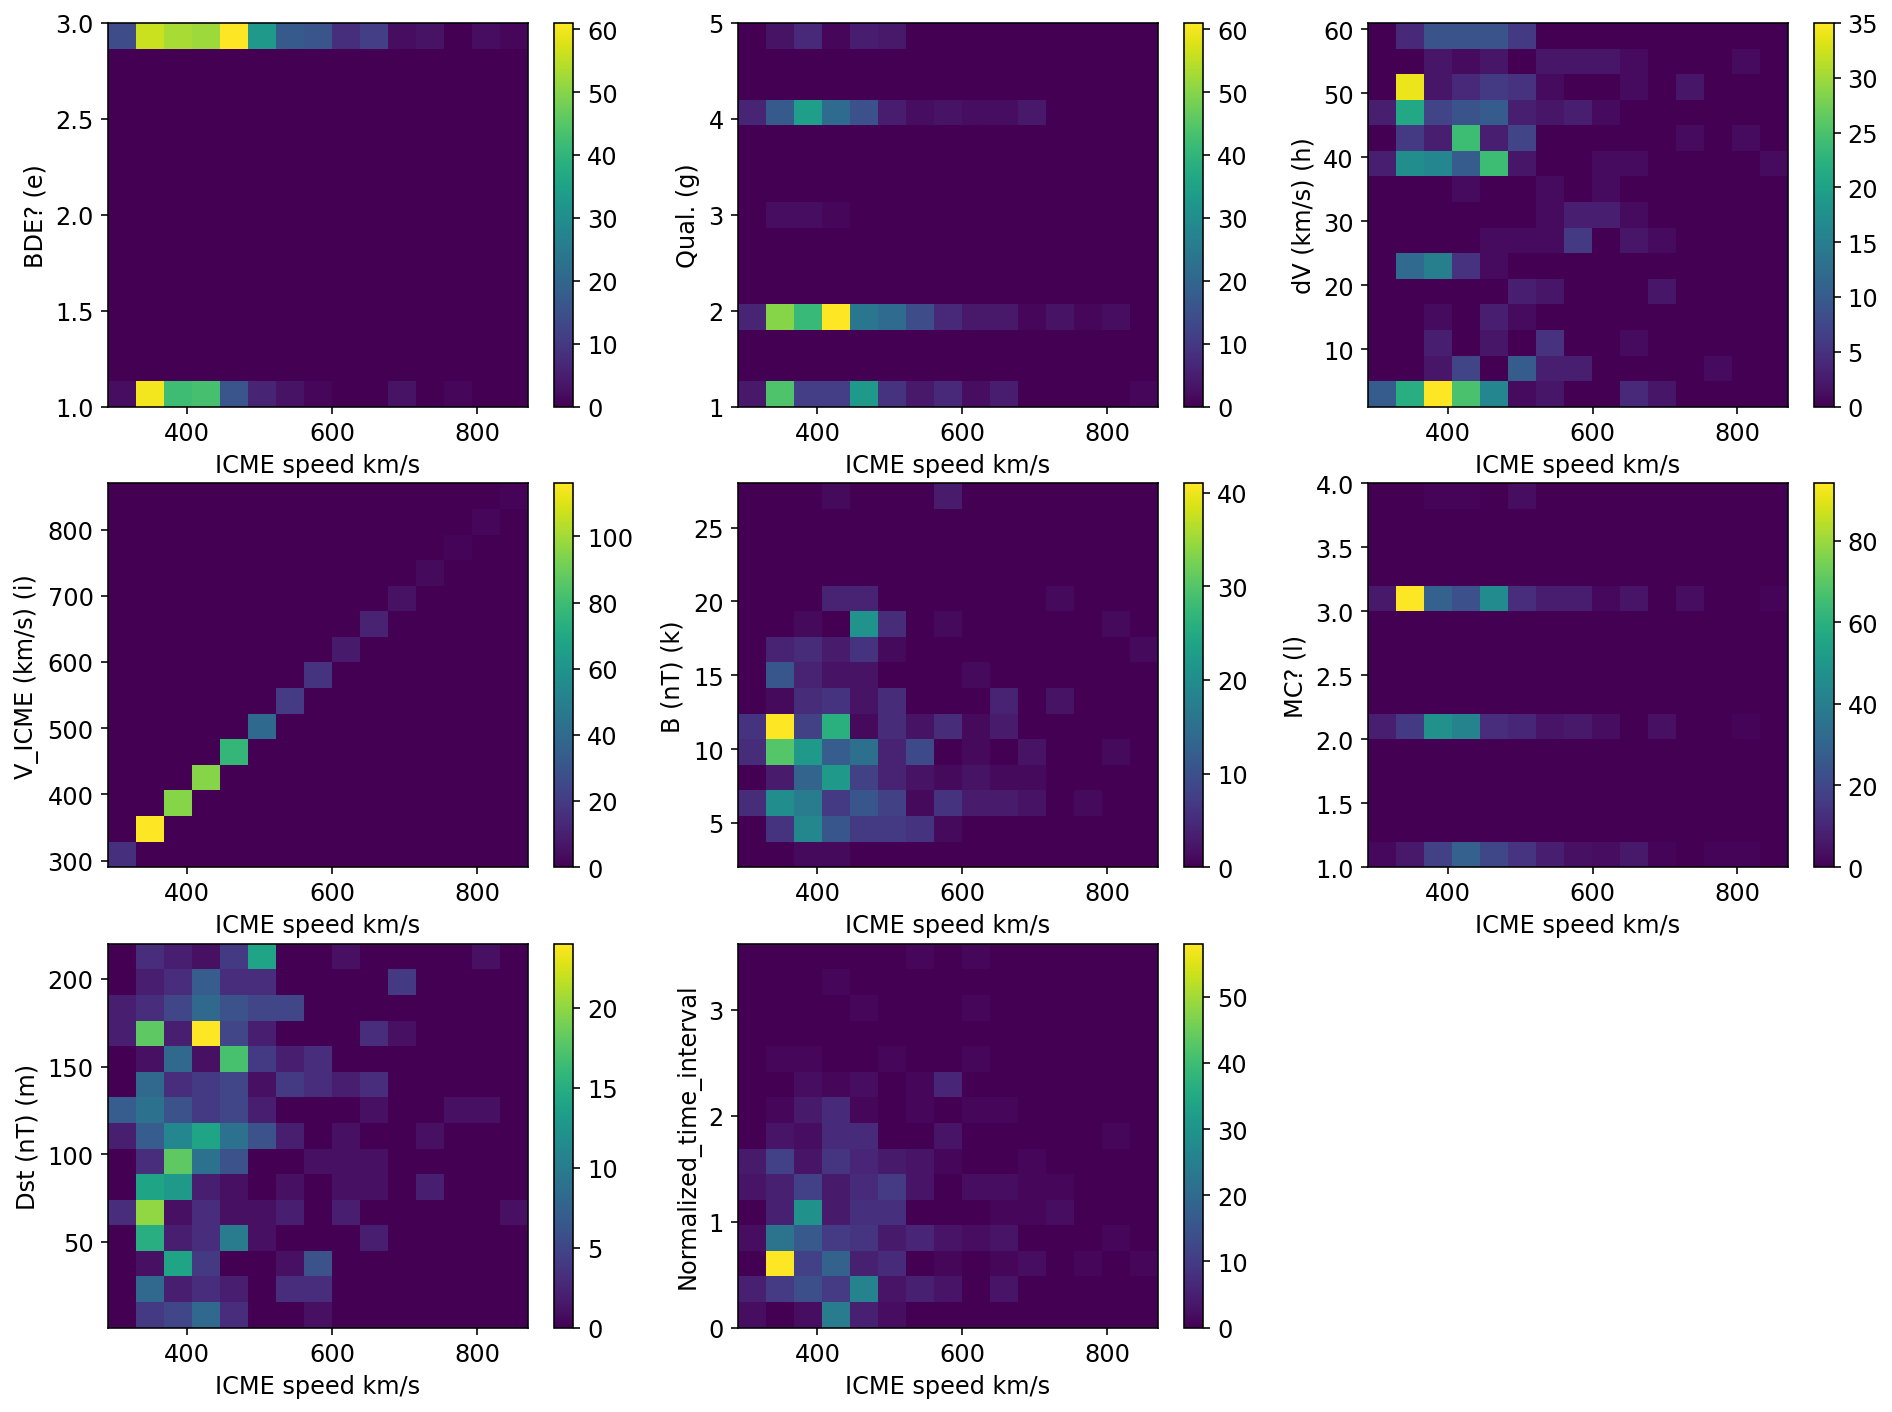

In [60]:
plt.figure(figsize=(16,12))
main_col = 'V_ICME (km/s) (i)'

for i, col in enumerate(df.columns):
    
    plt.subplot(3,3,i+1)
    col1, col2 = [col, main_col]
    plt.hist2d(df[col2], 
               df[col1], bins=(15, 15))#, bins=(50, 50), vmax=400)
    plt.colorbar()
    plt.xlabel('ICME speed km/s')
    plt.ylabel(col1)
plt.savefig('../Figures/p04_02_tf_hist2d.png')
plt.show()

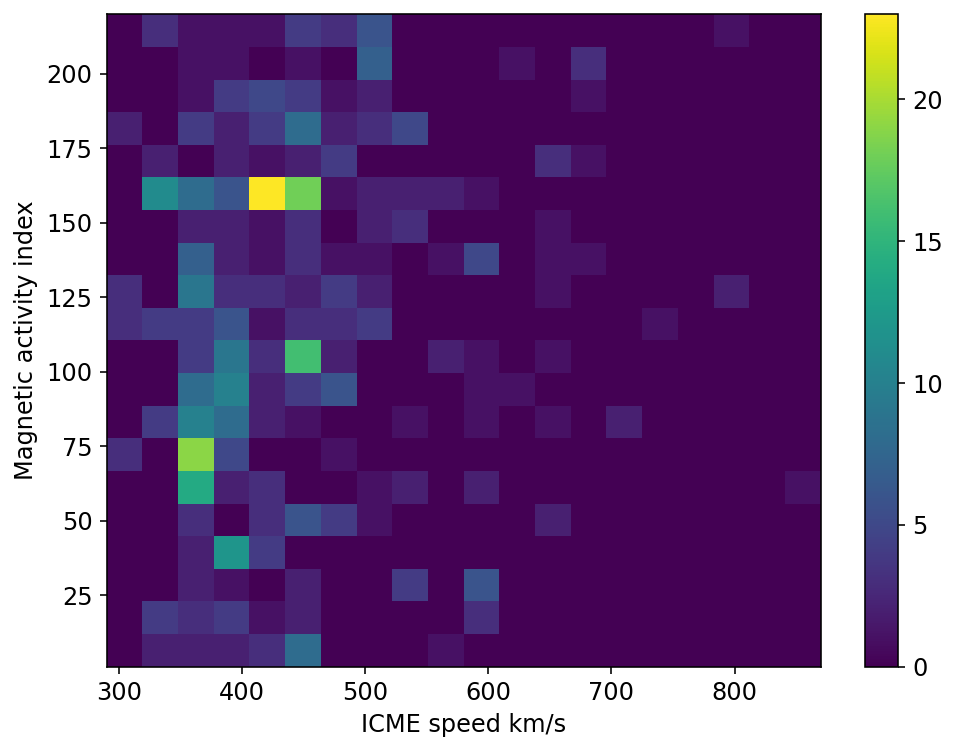

In [73]:
col1, col2 = ['V_ICME (km/s) (i)', 'Dst (nT) (m)']
plt.figure(figsize=(8,6))
plt.hist2d(df[col1], 
           df[col2], bins=(20, 20))#, bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('ICME speed km/s')
plt.ylabel('Magnetic activity index')
plt.savefig('../Figures/p04_02_tf_hist2d_3.png')


From the above plot, it is observed that the majority of ICME speed falls between 400 to 500 km/s and magnetic activity of -50nT to -60 nT. Note that, the Dst < -100 nT are considered severe solar storms (Zhang et al. 2007).
Although there is some high ICME speed recorded above 450 km/s, however, the data shows both low and high magnetic index disturbance which makes it inconclusive.

in the top- right side of plot, a severe solar strom is seen with ICME speed of around 800 km/s and Dst index of -99.

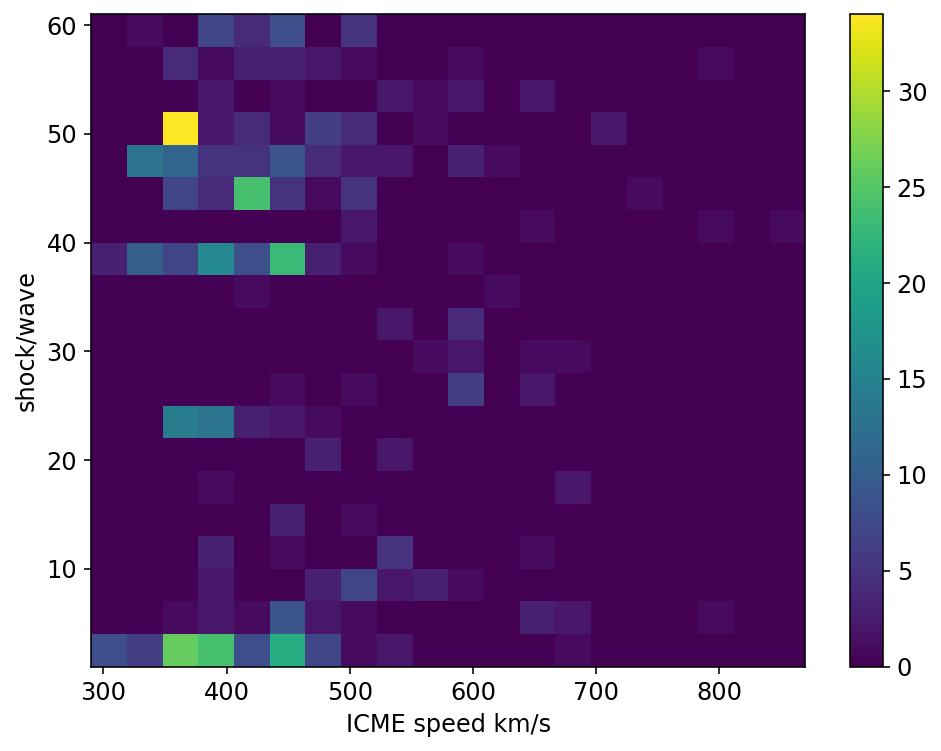

In [72]:
col1, col2 = ['V_ICME (km/s) (i)', 'dV (km/s) (h)']
plt.figure(figsize=(8,6))
plt.hist2d(df[col1], 
           df[col2], bins=(20, 20))#, bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('ICME speed km/s')
plt.ylabel('shock/wave')

plt.savefig('../Figures/p04_02_tf_hist2d_4.png')


The majority of data have 60 shocks per wave according to the above plot.

## Split the data

In [35]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [36]:
column_indices

{'BDE? (e)': 0,
 'Qual. (g)': 1,
 'dV (km/s) (h)': 2,
 'V_ICME (km/s) (i)': 3,
 'B (nT) (k)': 4,
 'MC? (l)': 5,
 'Dst (nT) (m)': 6,
 'Normalized_time_interval': 7}

## Normalization



**NOTE:** 

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets (ref: tf_website). It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages.


Normalizing data using average appraoch.

In [37]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

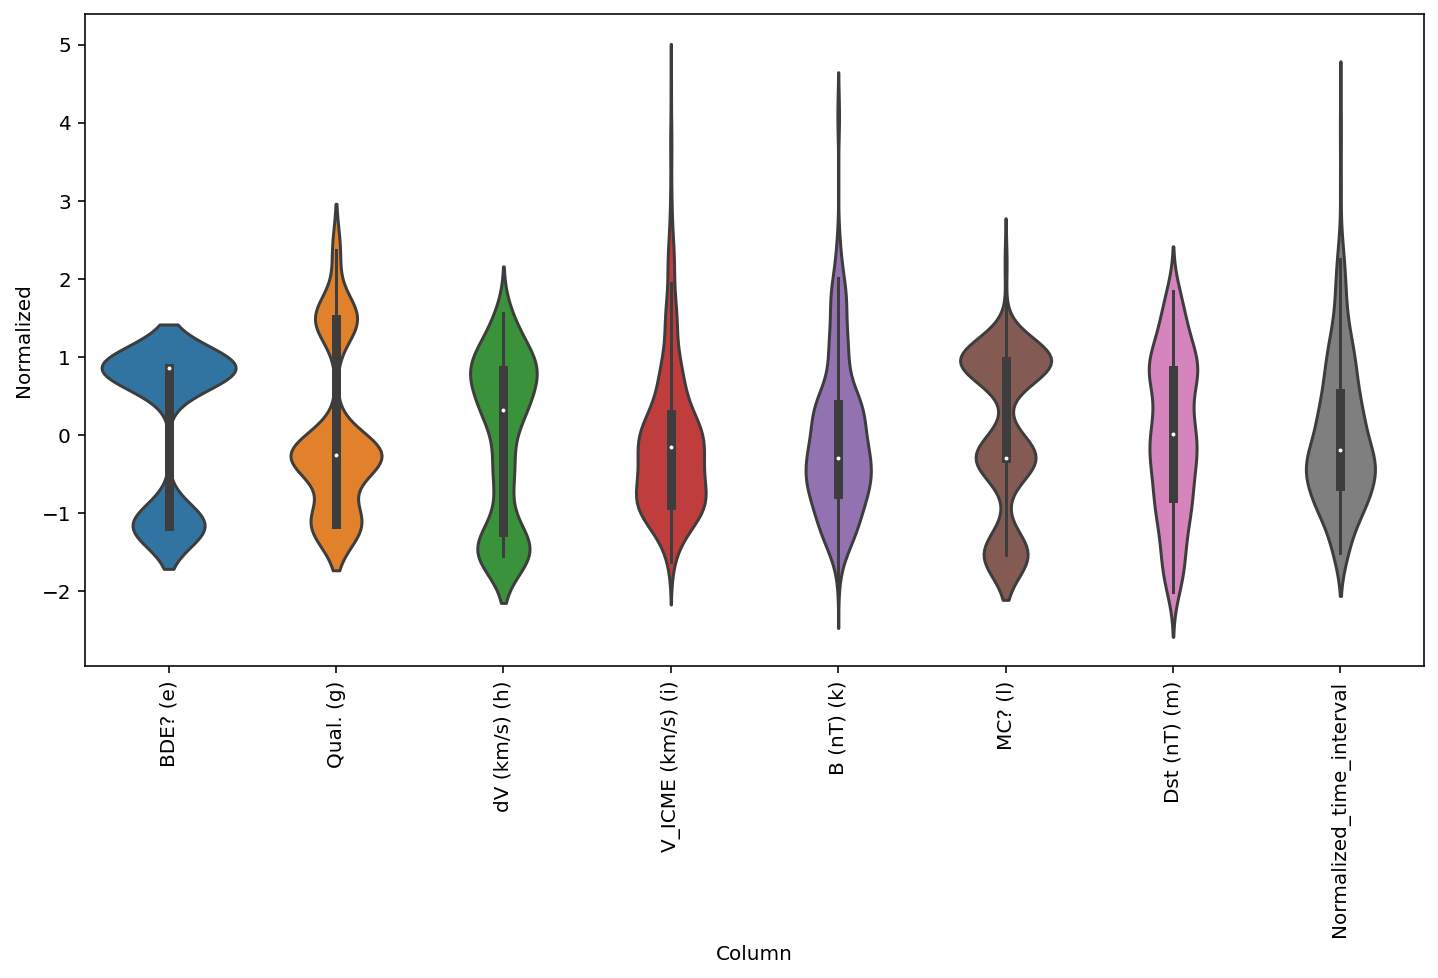

In [38]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data windowing


In [39]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

        def __repr__(self):
            return '\n'.join([
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'])

For example, to make a single prediction 24 hours into the future, given 24 hours of history, you might define window like this (ref: ts website toturial):

<p align="left">
  <img width="600" src="../Assets/w1.png" >
</p>

[source](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en)

In [40]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['V_ICME (km/s) (i)'])
print(w1.total_window_size)
print(w1.label_indices)
print(w1.input_indices)

48
[47]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


A model that makes a prediction one hour into the future, given six hours of history, would need a window like this:

<p align="left">
  <img width="400" src="../Assets/w2.png" >
</p>

[source](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en)

In [41]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['V_ICME (km/s) (i)'])
print(w2.total_window_size)
print(w2.label_indices)
print(w2.input_indices)

7
[6]
[0 1 2 3 4 5]


## Split

In [42]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

## Stack three slices, the length of the total window.


In [118]:
len(train_df)

354

In [119]:
train_df.shape

(354, 8)

In [124]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[0:0+w2.total_window_size]),
                           np.array(train_df[10:10+w2.total_window_size]),
                           np.array(train_df[20:20+w2.total_window_size]),
                           np.array(train_df[30:30+w2.total_window_size]),
                           np.array(train_df[40:40+w2.total_window_size]),
                           np.array(train_df[50:50+w2.total_window_size])])



In [125]:
w2.total_window_size

7

In [126]:
example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (7, 7, 8)
Inputs shape: (7, 6, 8)
Labels shape: (7, 1, 1)


## Plot window visualization

In [132]:
# w2.example = example_inputs, example_labels

In [133]:

col = 'V_ICME (km/s) (i)'


def plot(self, model=None, plot_col=col, max_subplots=3):
    
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:

            pass

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)

        if model is not None:

            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

    if n == 0:
        plt.legend()

    plt.xlabel(col)

WindowGenerator.plot = plot

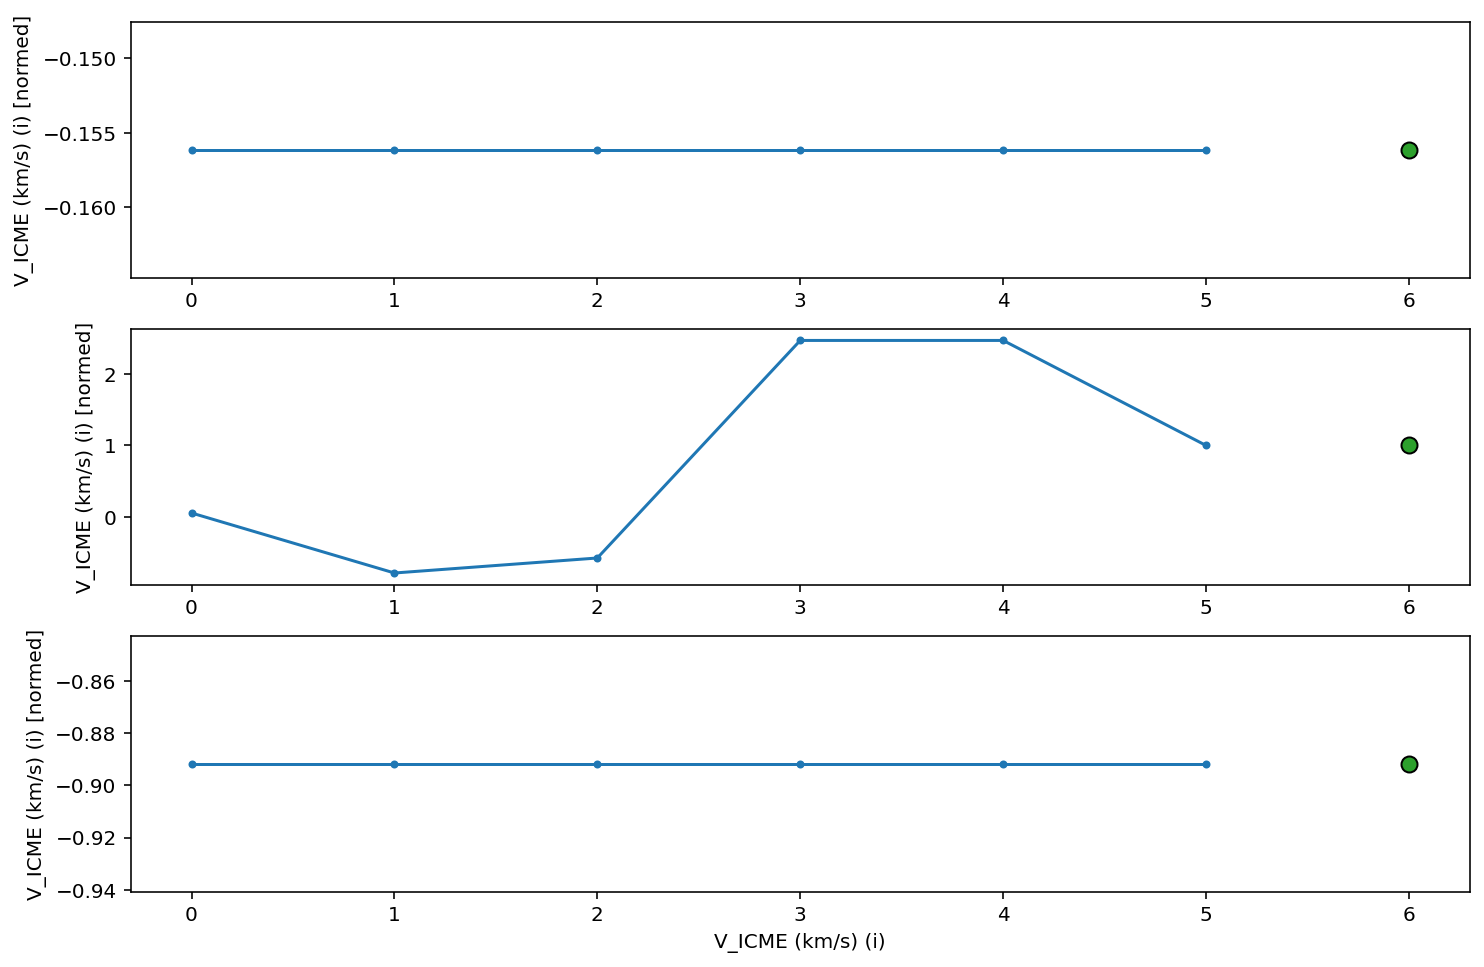

In [134]:
w2.plot()

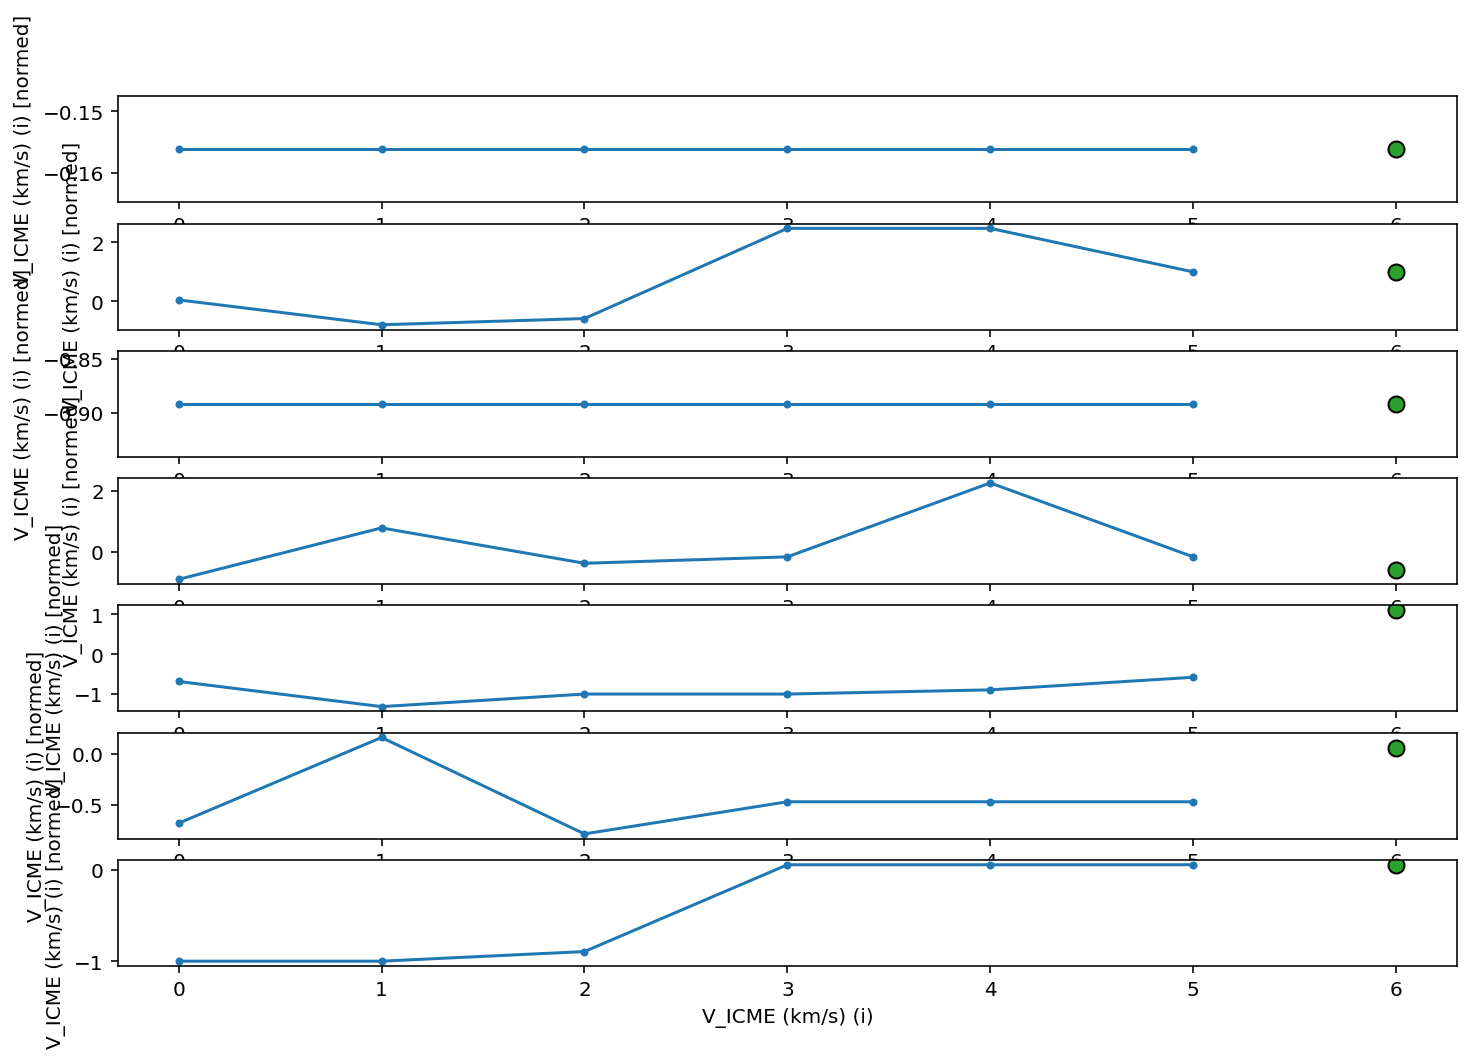

In [135]:

col = 'V_ICME (km/s) (i)'
w2.plot(model=None, plot_col=col, max_subplots=7)

## Create tf.data.Datasets

In [136]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [137]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    
    if result is None:
        
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
        
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [138]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [139]:
for example_inputs, example_labels in w2.train.take(-1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch,

# Single step models

In [140]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['V_ICME (km/s) (i)'])
single_step_window

In [141]:
for example_inputs, example_labels in single_step_window.train.take(-1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch,

## Baseline

In [142]:
class Baseline(tf.keras.Model):
    
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [143]:
baseline = Baseline(label_index=column_indices['V_ICME (km/s) (i)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

4/4 [==============================] - 0s 1ms/step - loss: 0.4414 - mean_absolute_error: 0.3425


In [144]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['V_ICME (km/s) (i)'])

wide_window

In [145]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 8)
Output shape: (32, 24, 1)


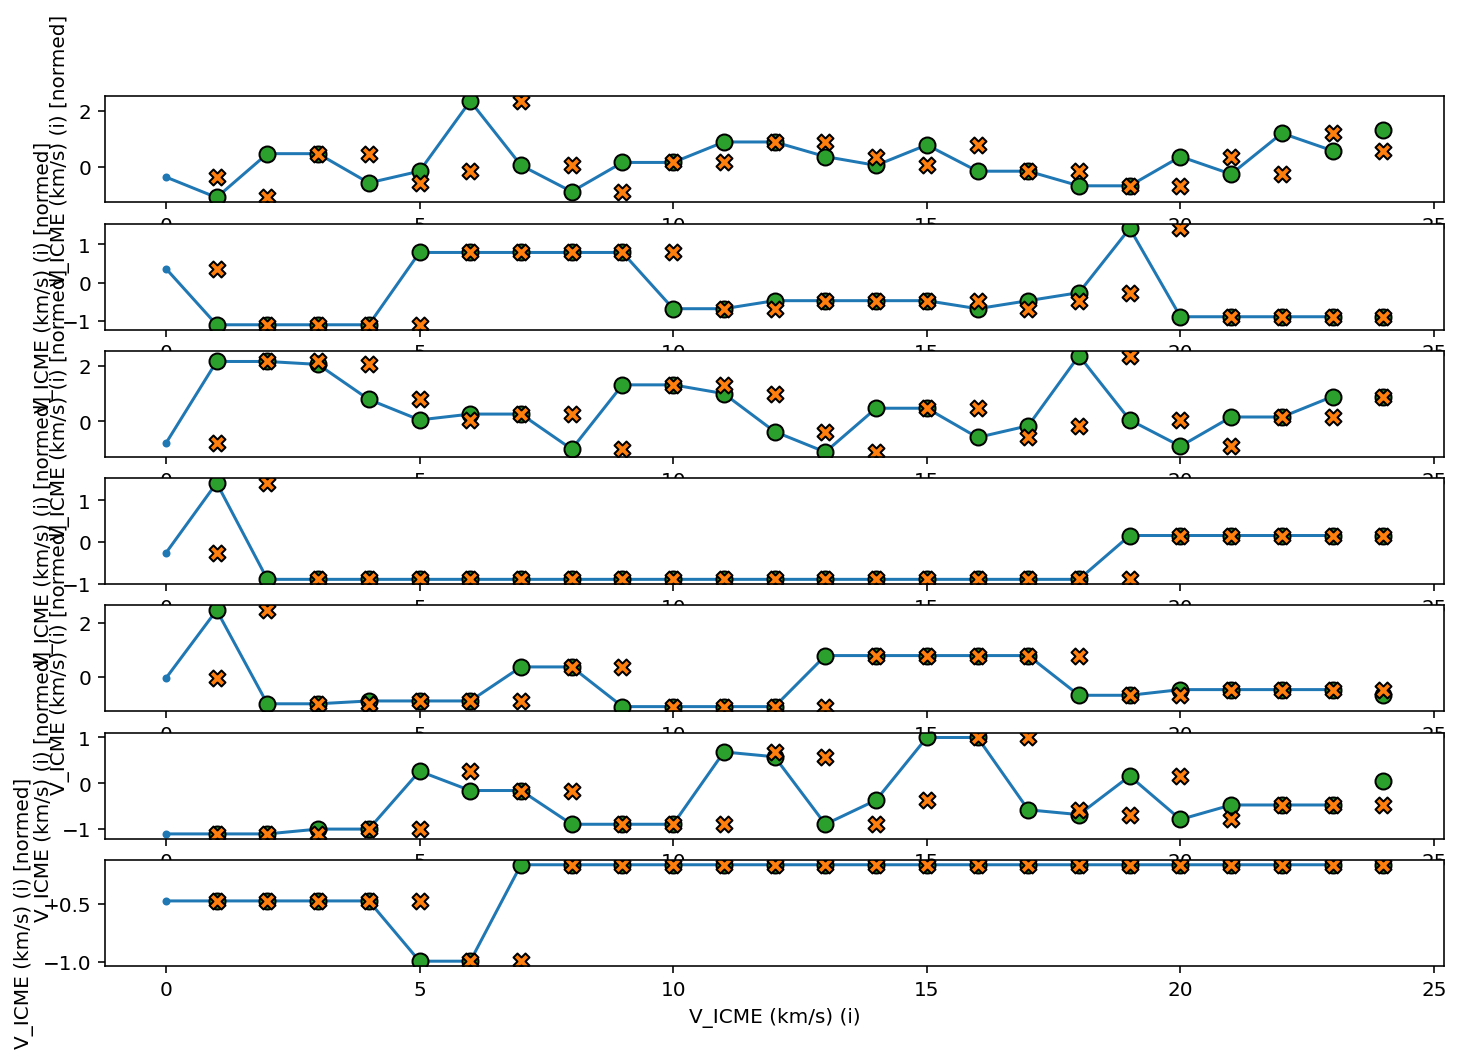

In [147]:
wide_window.plot(baseline,max_subplots=7)

# Linear model


A tf.keras.layers.Dense layer with no activation set is a linear model. 

In [148]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [149]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 8)
Output shape: (32, 1, 1)


In [160]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      #callbacks=[early_stopping],
                       )
    return history

In [161]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
12/12 [==============================] - 0s 14ms/step - loss: 2.4750 - mean_absolute_error: 1.2341 - val_loss: 2.6243 - val_mean_absolute_error: 1.2567
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 2.4067 - mean_absolute_error: 1.2150 - val_loss: 2.5546 - val_mean_absolute_error: 1.2399
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 2.3445 - mean_absolute_error: 1.1973 - val_loss: 2.4902 - val_mean_absolute_error: 1.2243
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 2.2847 - mean_absolute_error: 1.1797 - val_loss: 2.4285 - val_mean_absolute_error: 1.2088
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 2.2282 - mean_absolute_error: 1.1630 - val_loss: 2.3647 - val_mean_absolute_error: 1.1926
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 2.1727 - mean_absolute_error: 1.1457 - val_loss: 2.3080 - val_mean_absolute_error: 1.1782
Epoch 7/50
12/12 [=========

In [162]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 8)
Output shape: (32, 24, 1)


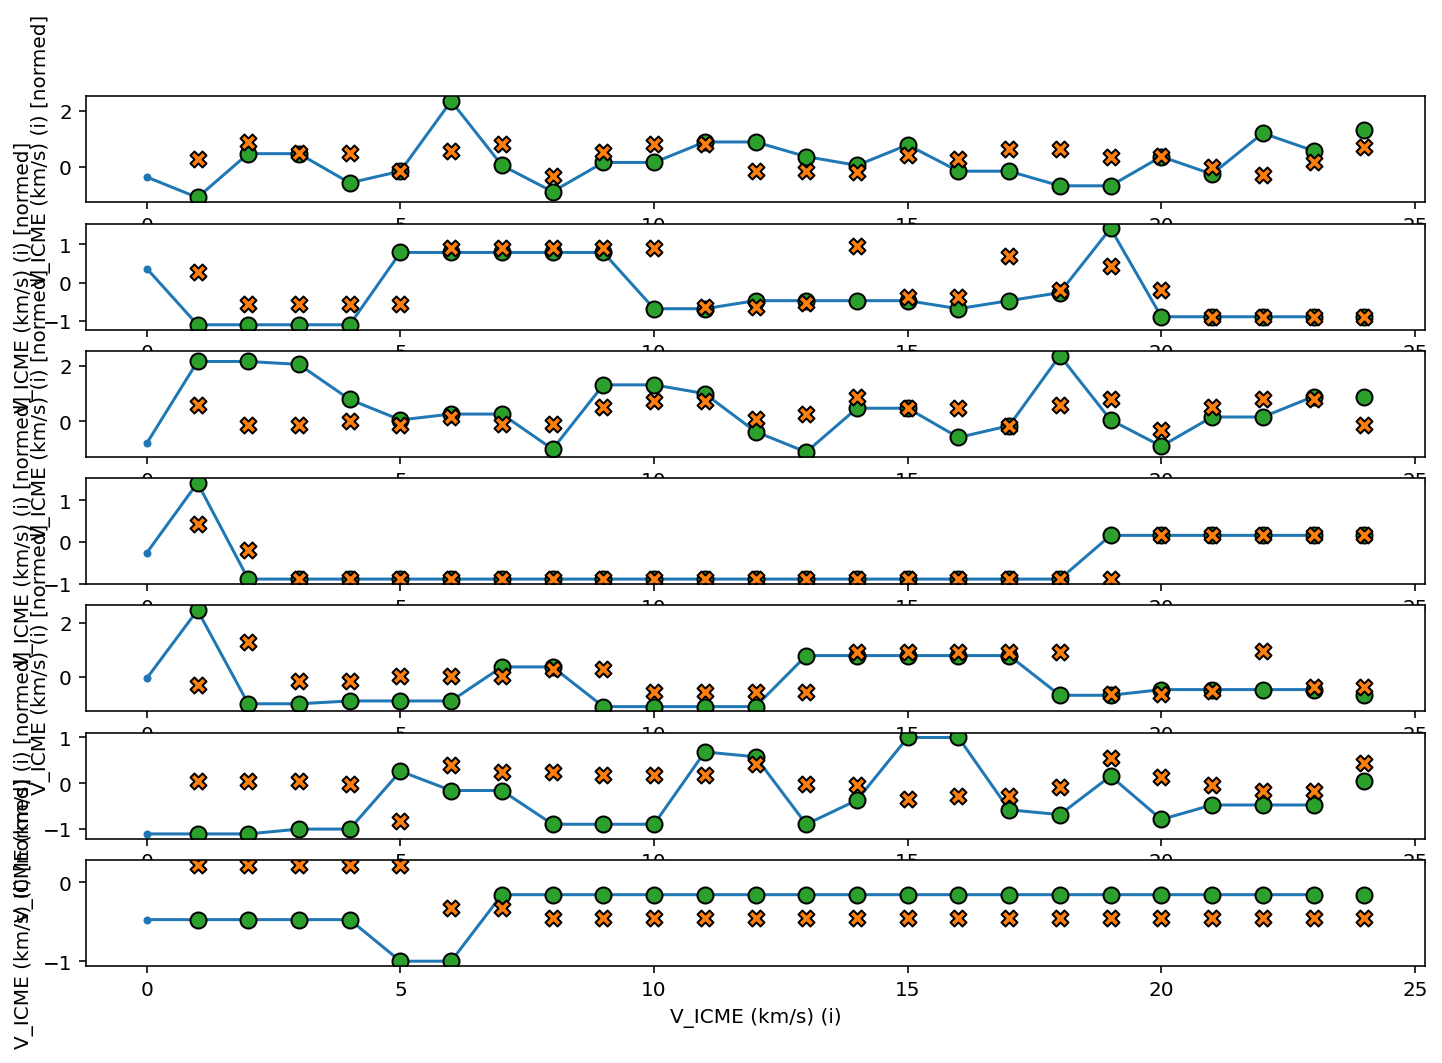

In [163]:
wide_window.plot(linear,max_subplots=7)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights and visualize the weight assigned to each input:

[ref](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en)

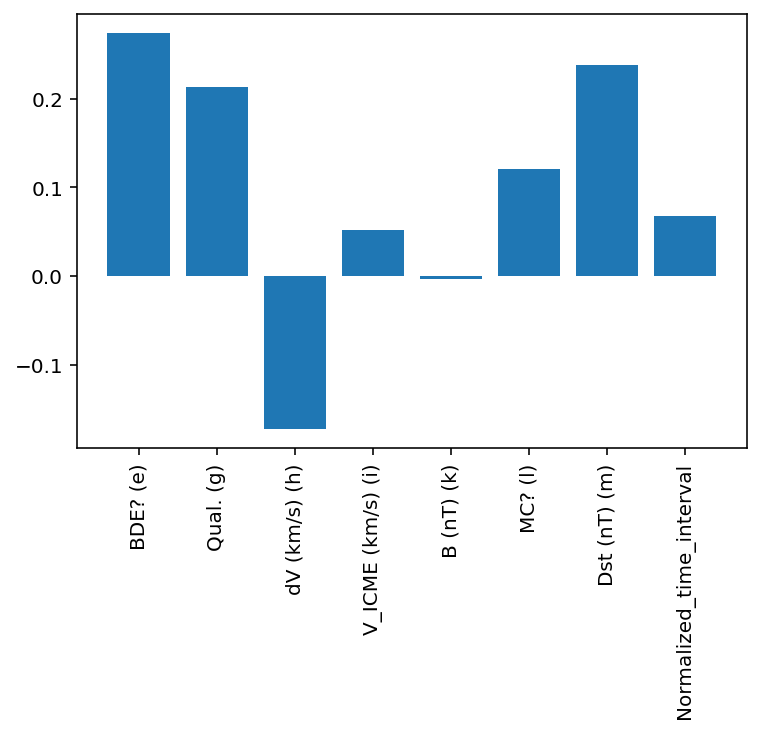

In [164]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

# Dense

In [165]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 0.9714 - mean_absolute_error: 0.7205 - val_loss: 0.6255 - val_mean_absolute_error: 0.6531
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.8047 - mean_absolute_error: 0.6612 - val_loss: 0.5778 - val_mean_absolute_error: 0.6189
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7495 - mean_absolute_error: 0.6019 - val_loss: 0.5067 - val_mean_absolute_error: 0.5650
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7192 - mean_absolute_error: 0.5649 - val_loss: 0.5040 - val_mean_absolute_error: 0.5627
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7058 - mean_absolute_error: 0.5995 - val_loss: 0.5933 - val_mean_absolute_error: 0.6176
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7321 - mean_absolute_error: 0.6226 - val_loss: 0.5681 - val_mean_absolute_error: 0.5956
Epoch 7/50
12/12 [=========

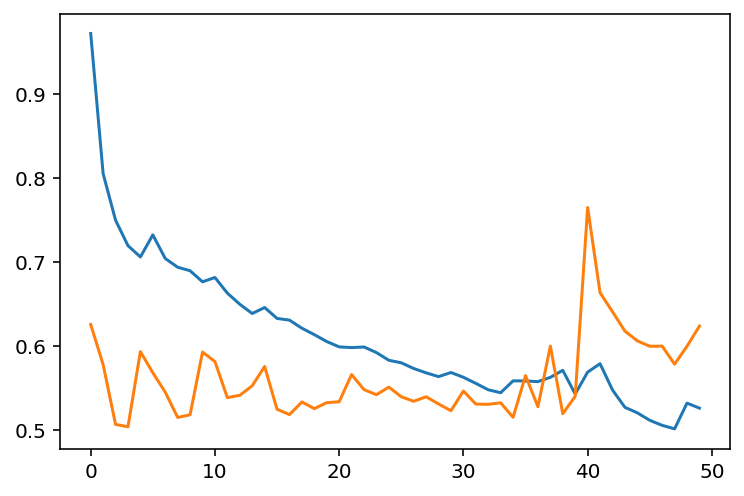

In [166]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Multi-step dense

The baseline, linear and dense models handled each time step independently. Here the model will take multiple time steps as input to produce a single output.

In [167]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['V_ICME (km/s) (i)'])

conv_window

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

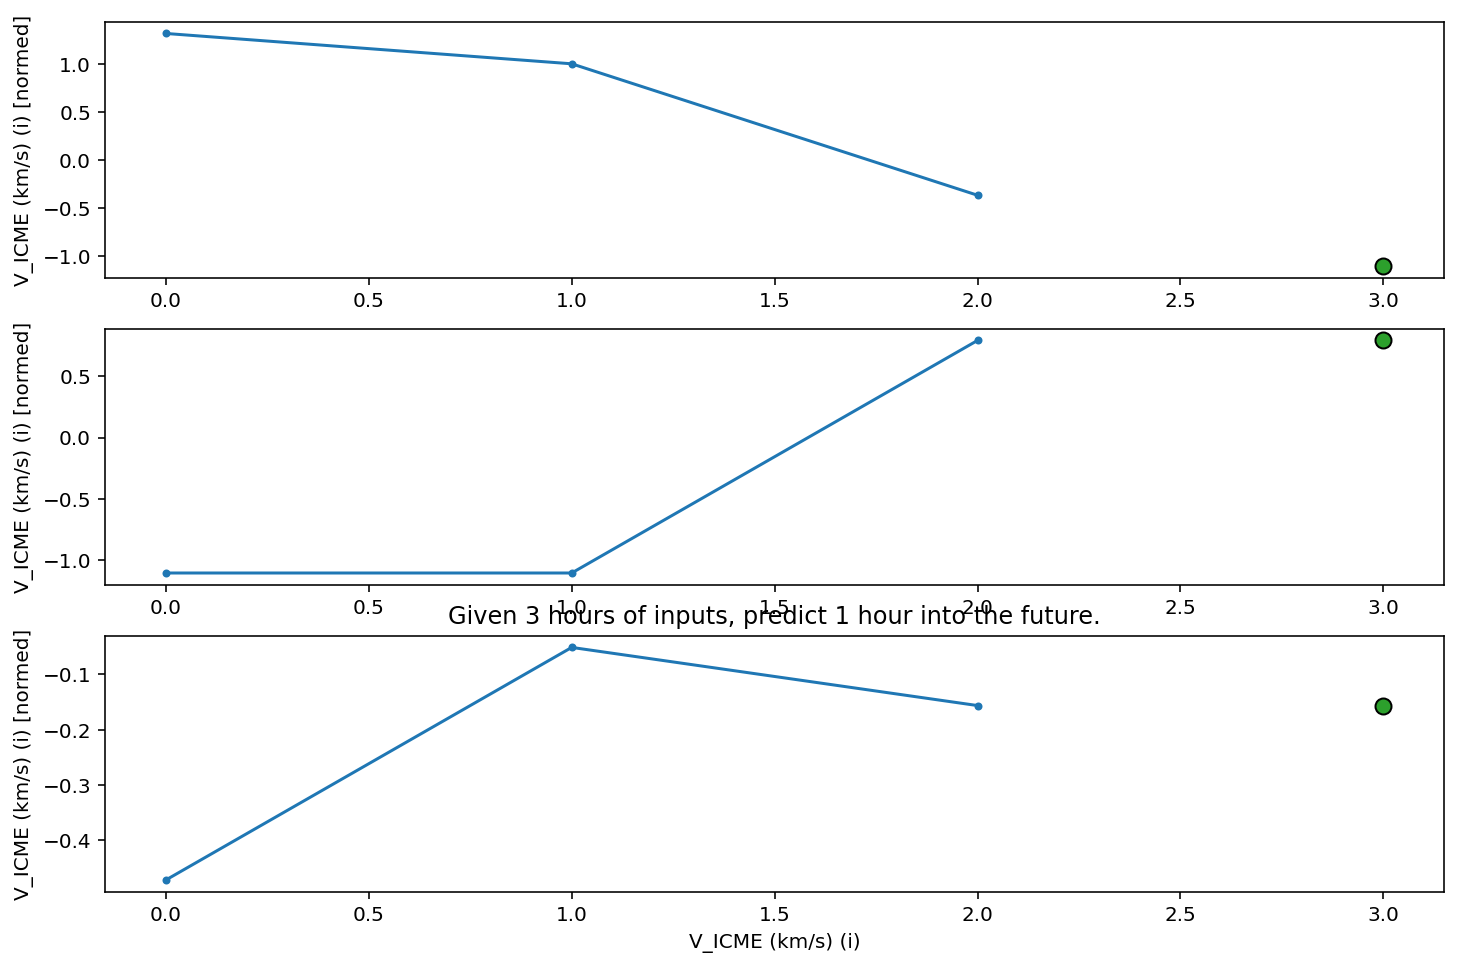

In [168]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [169]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [170]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 8)
Output shape: (32, 1, 1)


In [179]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/50
11/11 [==============================] - 0s 15ms/step - loss: 0.2526 - mean_absolute_error: 0.3430 - val_loss: 0.7415 - val_mean_absolute_error: 0.6810
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2390 - mean_absolute_error: 0.3264 - val_loss: 0.7047 - val_mean_absolute_error: 0.6622
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2292 - mean_absolute_error: 0.3116 - val_loss: 0.7264 - val_mean_absolute_error: 0.6708
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2244 - mean_absolute_error: 0.3047 - val_loss: 0.7365 - val_mean_absolute_error: 0.6781
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2185 - mean_absolute_error: 0.3038 - val_loss: 0.7270 - val_mean_absolute_error: 0.6683
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2160 - mean_absolute_error: 0.3015 - val_loss: 0.7283 - val_mean_absolute_error: 0.6724
Epoch 7/50
11/11 [=========

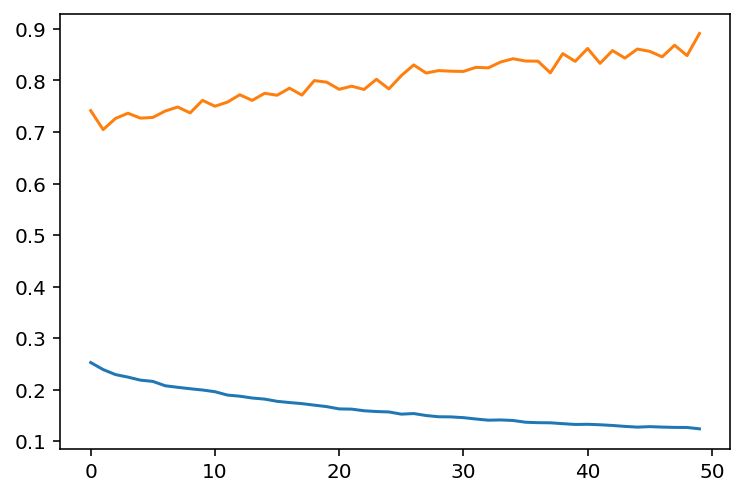

In [180]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

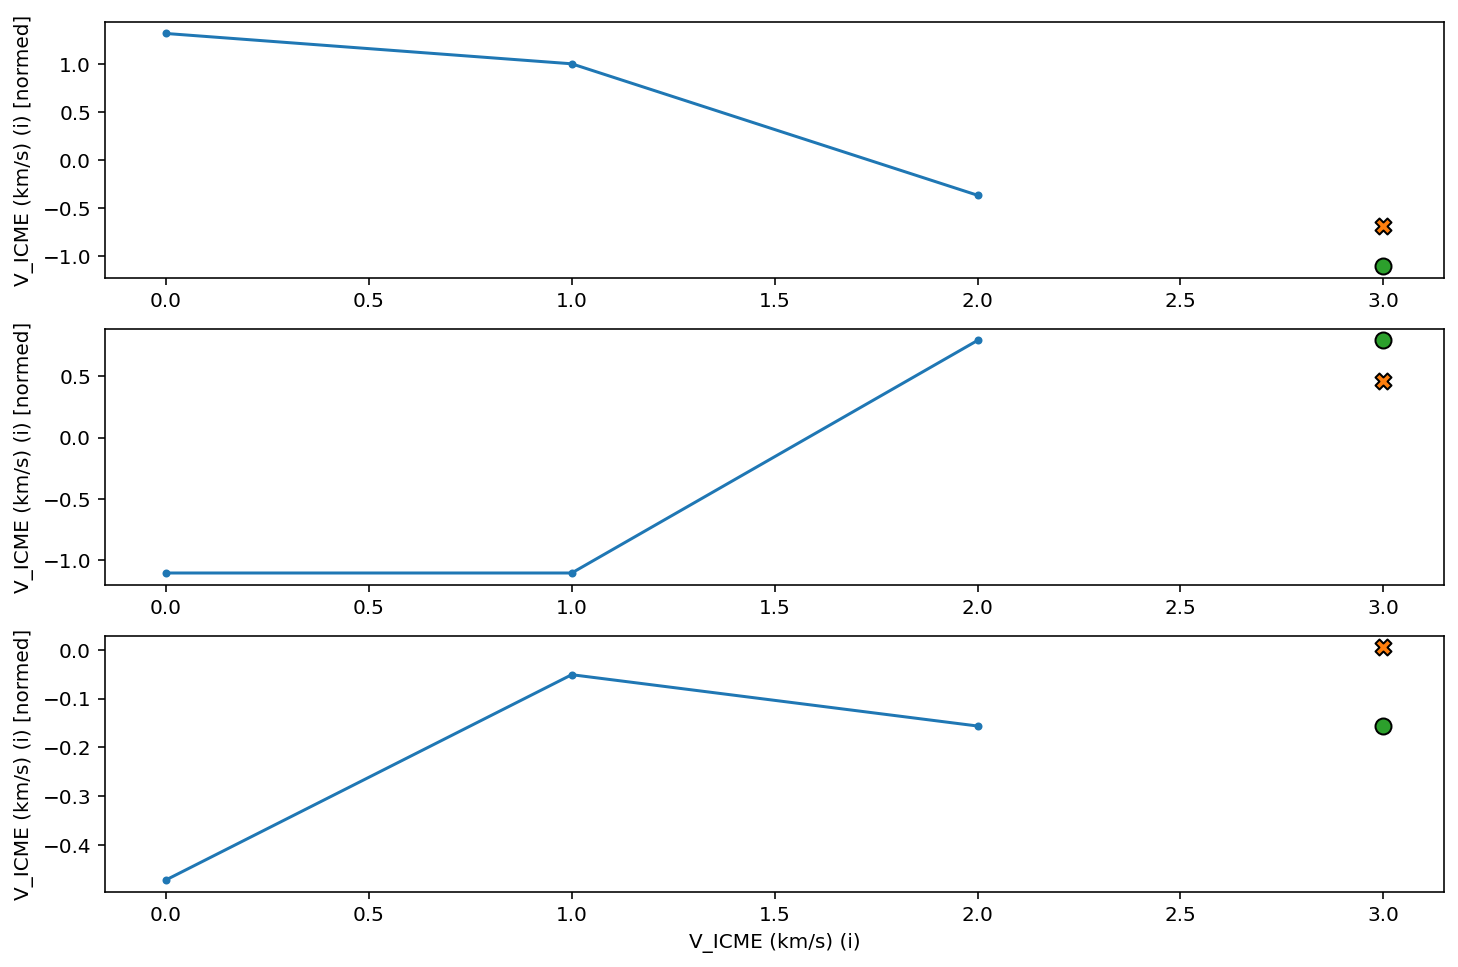

In [172]:
conv_window.plot(multi_step_dense)

In [173]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 8)

ValueError:Input 0 of layer dense_28 is incompatible with the layer: expected axis -1 of input shape to have value 24 but received input with shape (32, 192)


# Convolution neural network



<p align="left">
  <img width="400" src="../Assets/cnn.png" >
</p>

In [174]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [175]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 8)
Output shape: (32, 1, 1)


In [176]:
history = compile_and_fit(conv_model, conv_window)

# IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
11/11 [==============================] - 1s 18ms/step - loss: 0.9799 - mean_absolute_error: 0.7485 - val_loss: 0.5807 - val_mean_absolute_error: 0.6169
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.8847 - mean_absolute_error: 0.6878 - val_loss: 0.5482 - val_mean_absolute_error: 0.5900
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.8248 - mean_absolute_error: 0.6570 - val_loss: 0.5562 - val_mean_absolute_error: 0.5914
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7819 - mean_absolute_error: 0.6451 - val_loss: 0.5648 - val_mean_absolute_error: 0.5930
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7452 - mean_absolute_error: 0.6294 - val_loss: 0.5669 - val_mean_absolute_error: 0.5915
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7159 - mean_absolute_error: 0.6104 - val_loss: 0.5526 - val_mean_absolute_error: 0.5769
Epoch 7/50
11/11 [=========

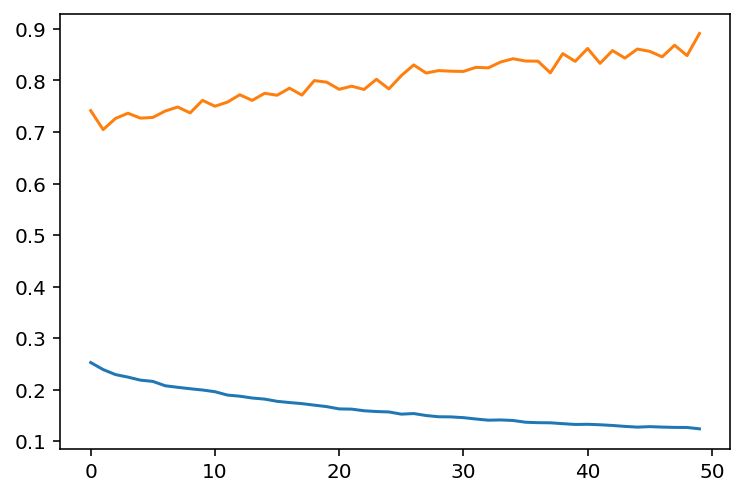

In [181]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [182]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 8)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [183]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['V_ICME (km/s) (i)'])

wide_conv_window

In [184]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 8)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


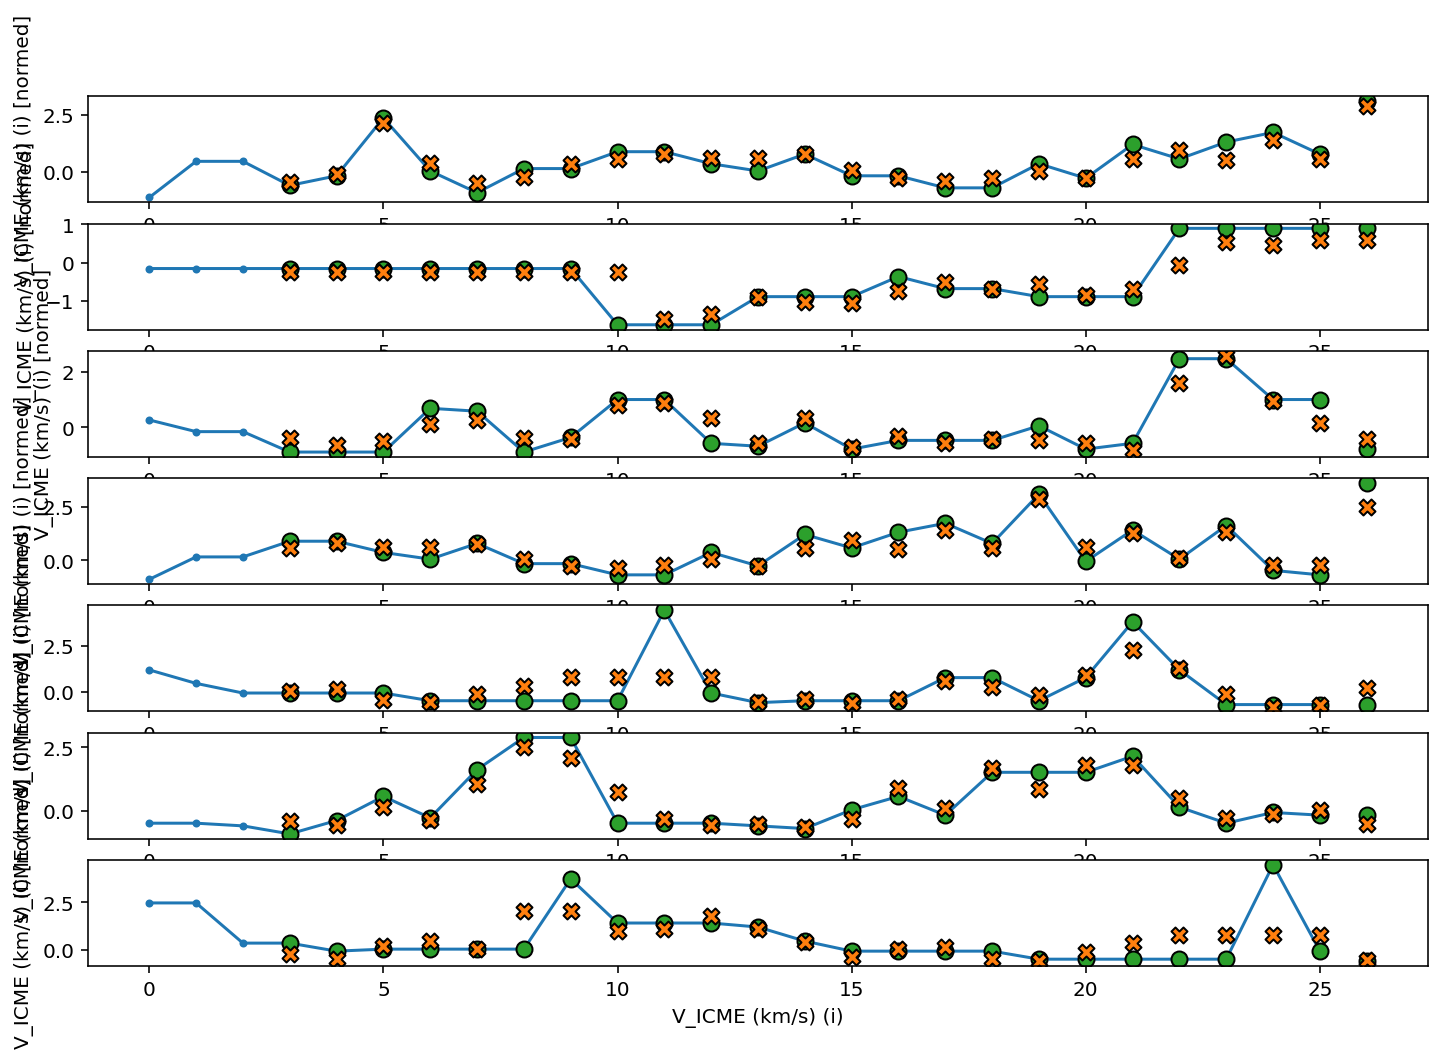

In [186]:
wide_conv_window.plot(conv_model,max_subplots=7)

# Recurrent neural network

In [81]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [82]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 8)
Output shape: (32, 24, 1)


In [187]:
history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
11/11 [==============================] - 2s 50ms/step - loss: 1.0492 - mean_absolute_error: 0.7743 - val_loss: 0.6436 - val_mean_absolute_error: 0.6466
Epoch 2/50
11/11 [==============================] - 0s 14ms/step - loss: 0.9588 - mean_absolute_error: 0.7323 - val_loss: 0.6046 - val_mean_absolute_error: 0.6264
Epoch 3/50
11/11 [==============================] - 0s 14ms/step - loss: 0.9045 - mean_absolute_error: 0.7096 - val_loss: 0.5816 - val_mean_absolute_error: 0.6119
Epoch 4/50
11/11 [==============================] - 0s 13ms/step - loss: 0.8662 - mean_absolute_error: 0.6939 - val_loss: 0.5640 - val_mean_absolute_error: 0.6002
Epoch 5/50
11/11 [==============================] - 0s 13ms/step - loss: 0.8358 - mean_absolute_error: 0.6804 - val_loss: 0.5538 - val_mean_absolute_error: 0.5949
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.8097 - mean_absolute_error: 0.6668 - val_loss: 0.5431 - val_mean_absolute_error: 0.5887
Epoch 7/50
11/11 [====

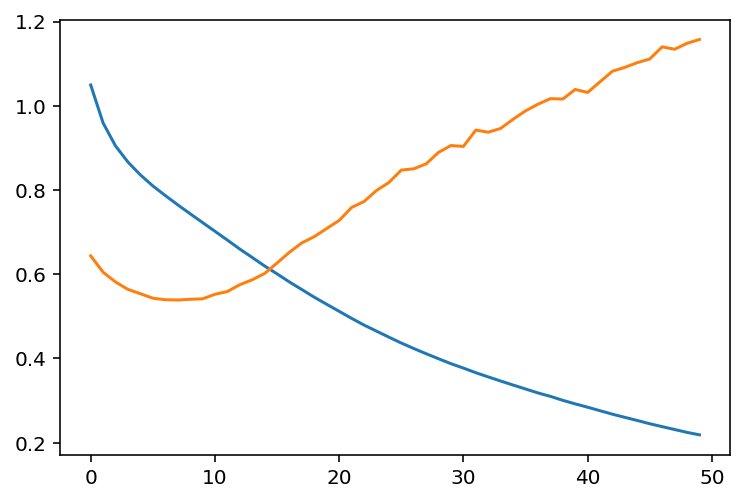

In [189]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

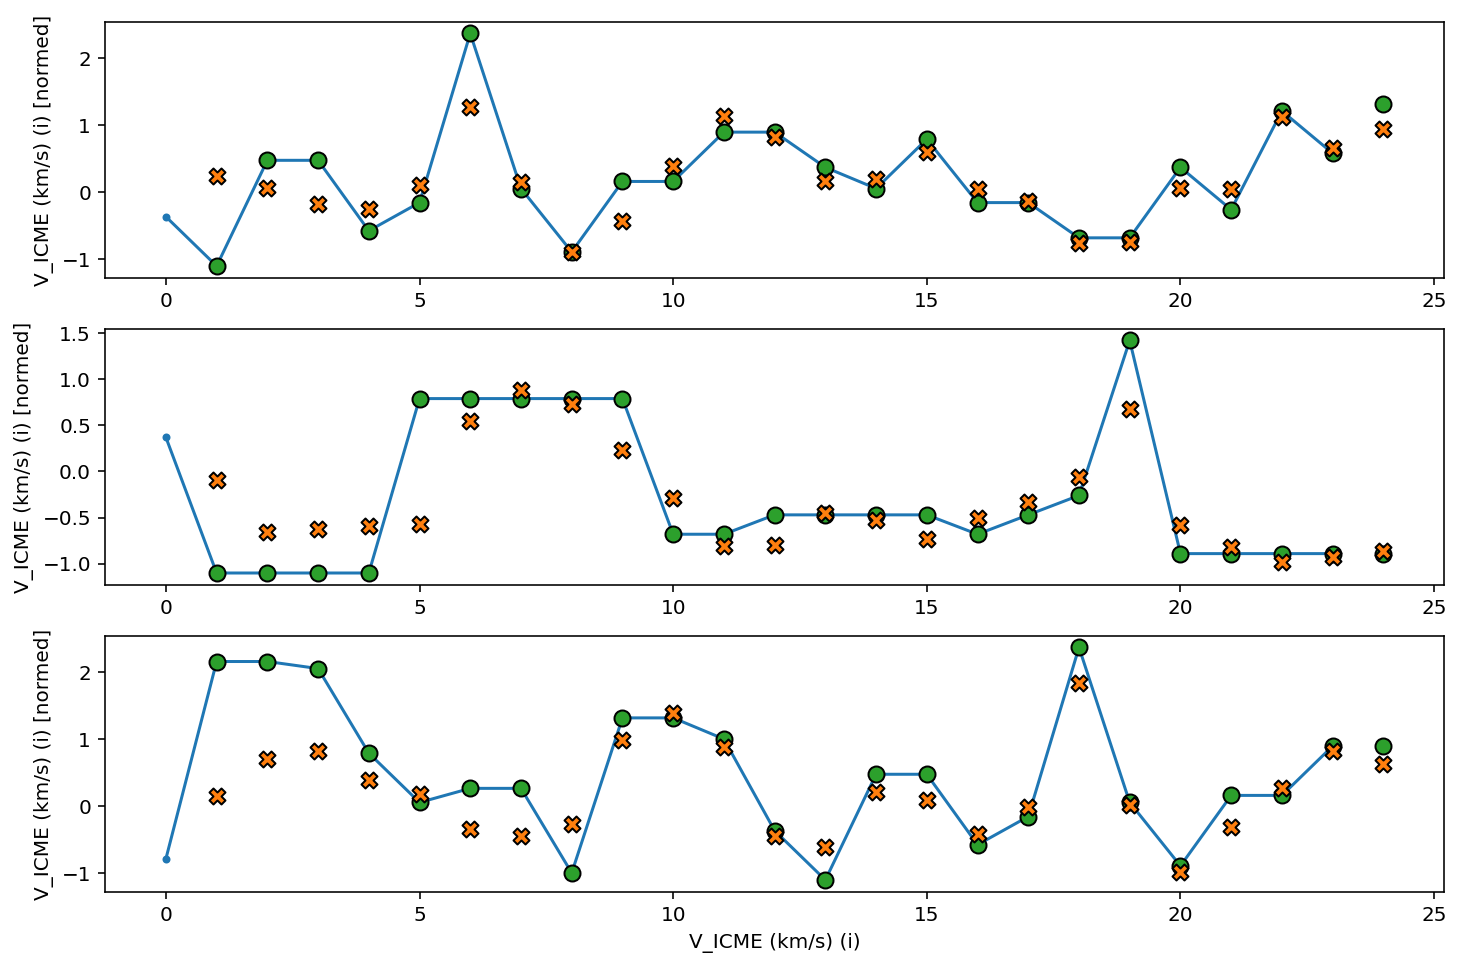

In [190]:
wide_window.plot(lstm_model)

# Performance

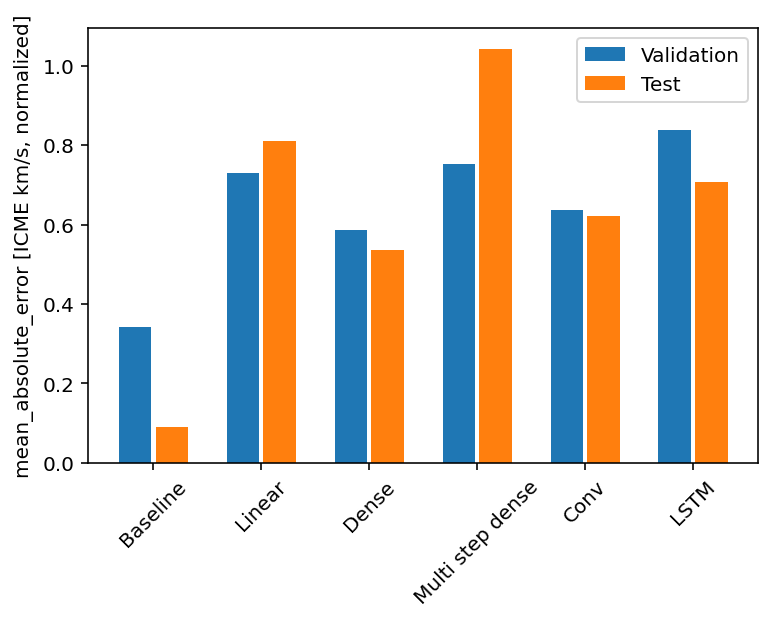

In [191]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [ICME km/s, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [192]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0904
Linear      : 0.8101
Dense       : 0.5355
Multi step dense: 1.0423
Conv        : 0.6206
LSTM        : 0.7067


# Multi-output models

In [193]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 8)
Labels shape (batch, time, features): (32, 24, 8)


### Baseline

In [194]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [195]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

3/3 [==============================] - 0s 1ms/step - loss: 0.7984 - mean_absolute_error: 0.4463


### Dense

In [196]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [197]:
history = compile_and_fit(dense, single_step_window)

# IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 1.0292 - mean_absolute_error: 0.8420 - val_loss: 0.9071 - val_mean_absolute_error: 0.8103
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9342 - mean_absolute_error: 0.8049 - val_loss: 0.8519 - val_mean_absolute_error: 0.7820
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.8836 - mean_absolute_error: 0.7789 - val_loss: 0.8232 - val_mean_absolute_error: 0.7643
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.8460 - mean_absolute_error: 0.7568 - val_loss: 0.7970 - val_mean_absolute_error: 0.7457
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.8210 - mean_absolute_error: 0.7412 - val_loss: 0.7797 - val_mean_absolute_error: 0.7308
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.8014 - mean_absolute_error: 0.7266 - val_loss: 0.7657 - val_mean_absolute_error: 0.7189
Epoch 7/50
12/12 [=========

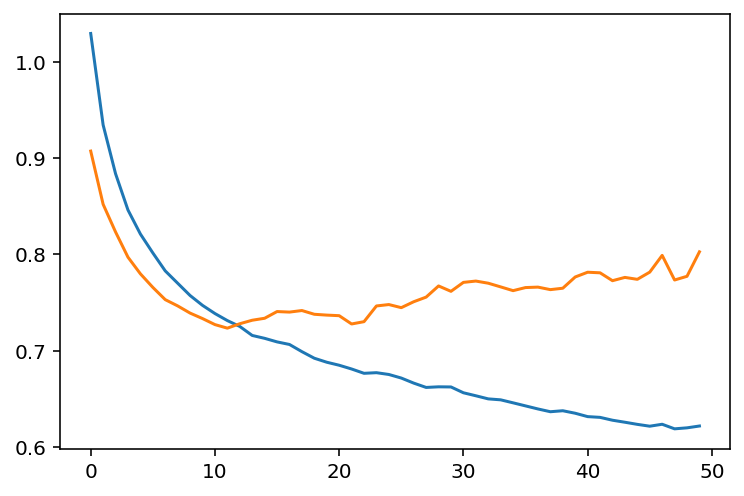

In [198]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### RNN

In [199]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

Epoch 1/50
11/11 [==============================] - 2s 47ms/step - loss: 1.0560 - mean_absolute_error: 0.8526 - val_loss: 1.0445 - val_mean_absolute_error: 0.8753
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 0.9894 - mean_absolute_error: 0.8261 - val_loss: 1.0106 - val_mean_absolute_error: 0.8570
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.9408 - mean_absolute_error: 0.8046 - val_loss: 0.9868 - val_mean_absolute_error: 0.8425
Epoch 4/50
11/11 [==============================] - 0s 12ms/step - loss: 0.9025 - mean_absolute_error: 0.7853 - val_loss: 0.9698 - val_mean_absolute_error: 0.8312
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 0.8721 - mean_absolute_error: 0.7680 - val_loss: 0.9548 - val_mean_absolute_error: 0.8208
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 0.8486 - mean_absolute_error: 0.7524 - val_loss: 0.9463 - val_mean_absolute_error: 0.8137
Epoch 7/50
11/11 [====

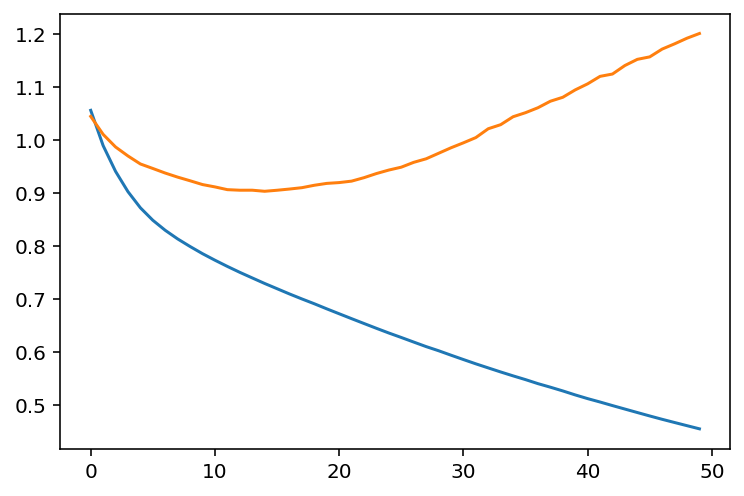

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Advanced: Residual connections

In [201]:
class ResidualWrapper(tf.keras.Model):
    
    def __init__(self, model):
        super().__init__()
        self.model = model

    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)

        # The prediction for each time step is the input
        # from the previous time step plus the delta
        # calculated by the model.
        return inputs + delta

In [202]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

# IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

Epoch 1/50
11/11 [==============================] - 2s 51ms/step - loss: 1.1381 - mean_absolute_error: 0.6081 - val_loss: 0.7865 - val_mean_absolute_error: 0.4543
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 1.1247 - mean_absolute_error: 0.6150 - val_loss: 0.7732 - val_mean_absolute_error: 0.4630
Epoch 3/50
11/11 [==============================] - 0s 13ms/step - loss: 1.1087 - mean_absolute_error: 0.6219 - val_loss: 0.7589 - val_mean_absolute_error: 0.4729
Epoch 4/50
11/11 [==============================] - 0s 15ms/step - loss: 1.0899 - mean_absolute_error: 0.6286 - val_loss: 0.7439 - val_mean_absolute_error: 0.4837
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 1.0675 - mean_absolute_error: 0.6344 - val_loss: 0.7292 - val_mean_absolute_error: 0.4965
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 1.0415 - mean_absolute_error: 0.6394 - val_loss: 0.7159 - val_mean_absolute_error: 0.5114
Epoch 7/50
11/11 [====

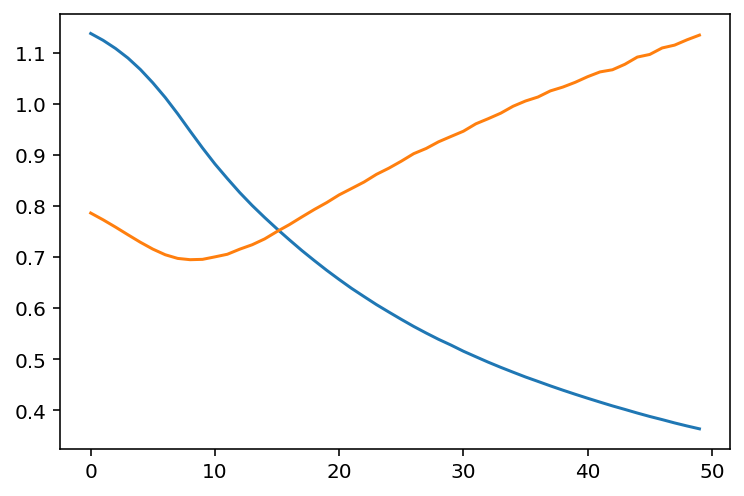

In [203]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Performance

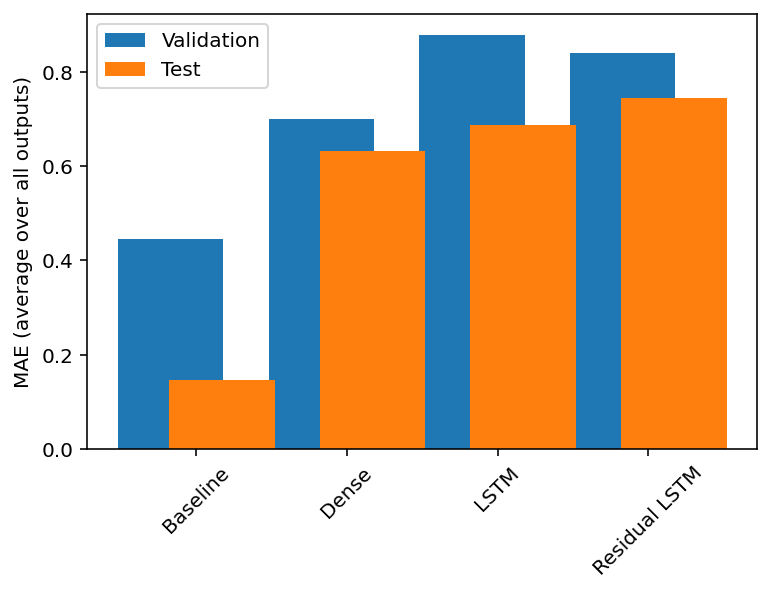

In [205]:
x = np.arange(len(performance))
width = 0.7

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [206]:
for name, value in performance.items():
    print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1472
Dense          : 0.6316
LSTM           : 0.6874
Residual LSTM  : 0.7446


# Multi-step models

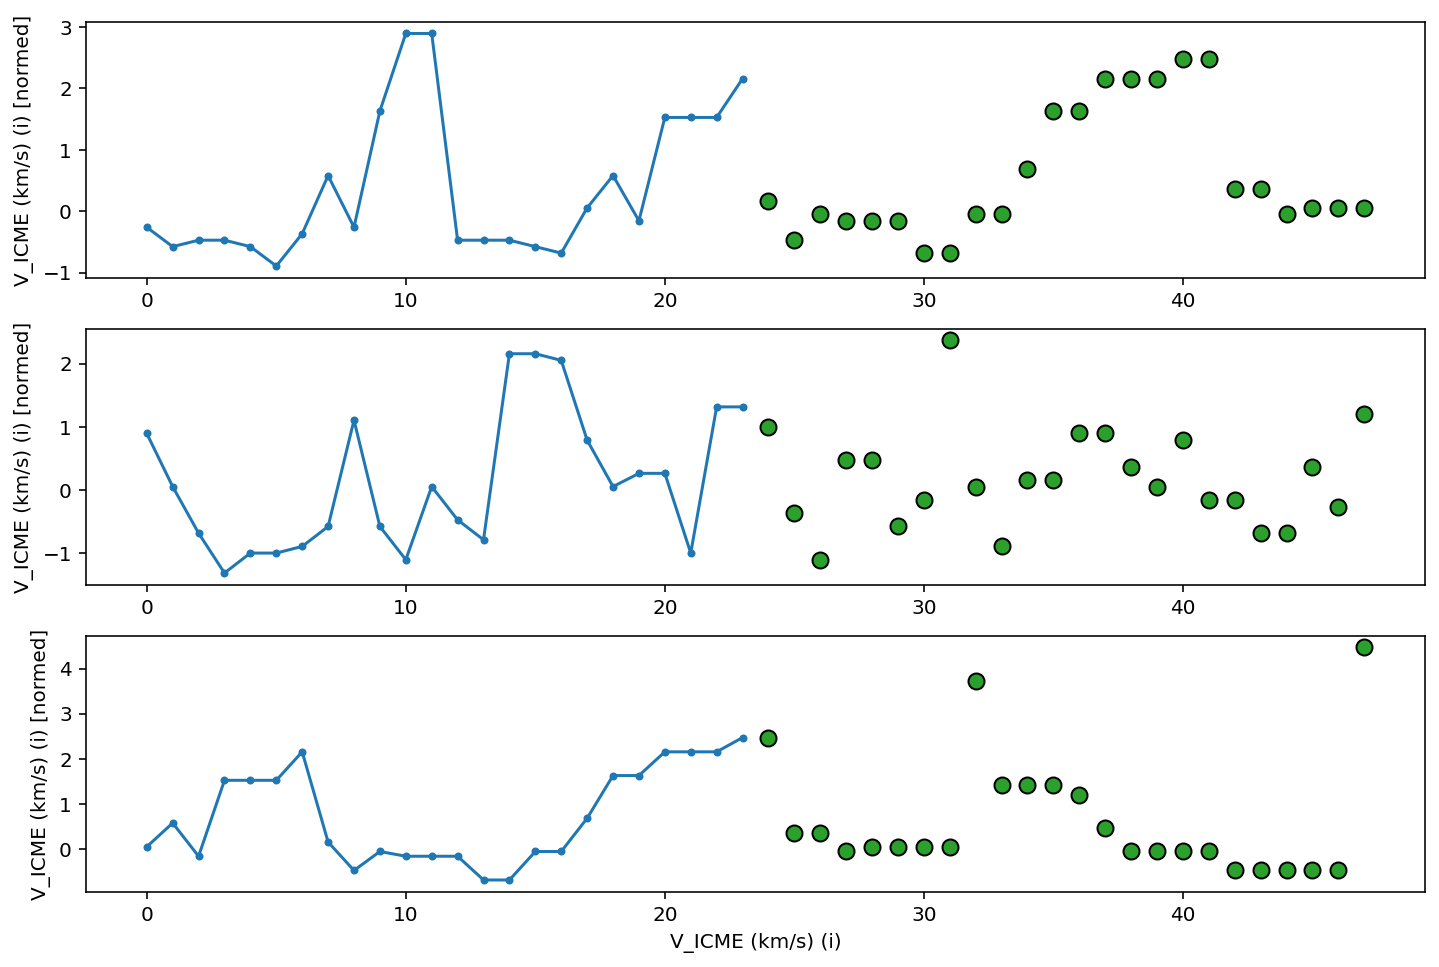

In [207]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baselines




<p align="left">
  <img width="400" src="../Assets/base_multi.png" >
</p>


2/2 [==============================] - 0s 2ms/step - loss: 2.0156 - mean_absolute_error: 1.0762


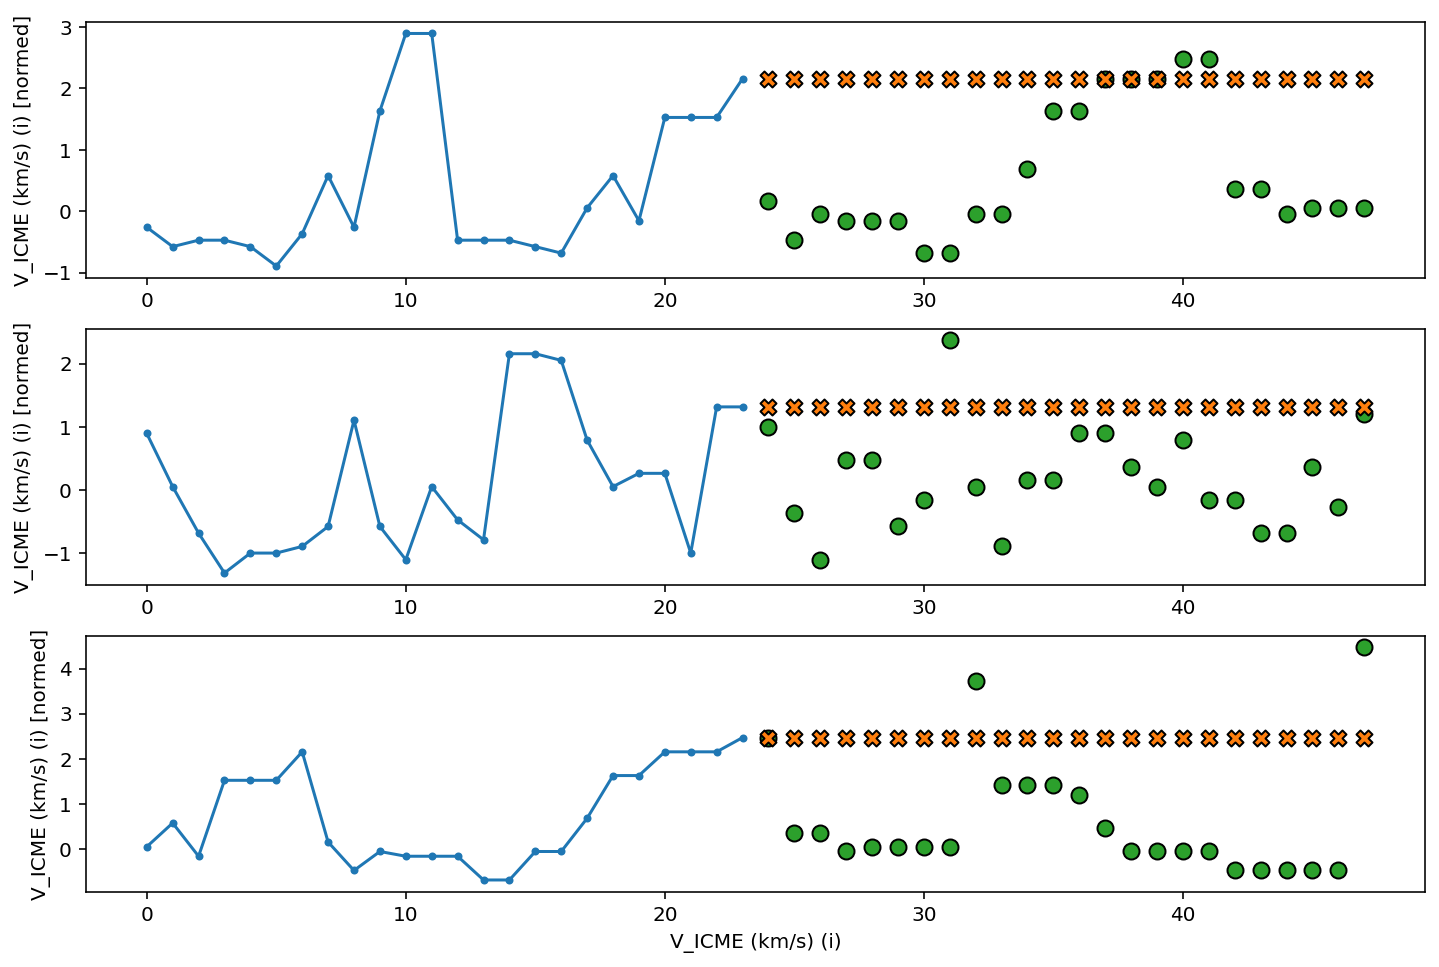

In [208]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)



<p align="left">
  <img width="400" src="../Assets/repeat_bs.png" >
</p>

2/2 [==============================] - 0s 2ms/step - loss: 2.2523 - mean_absolute_error: 1.1984


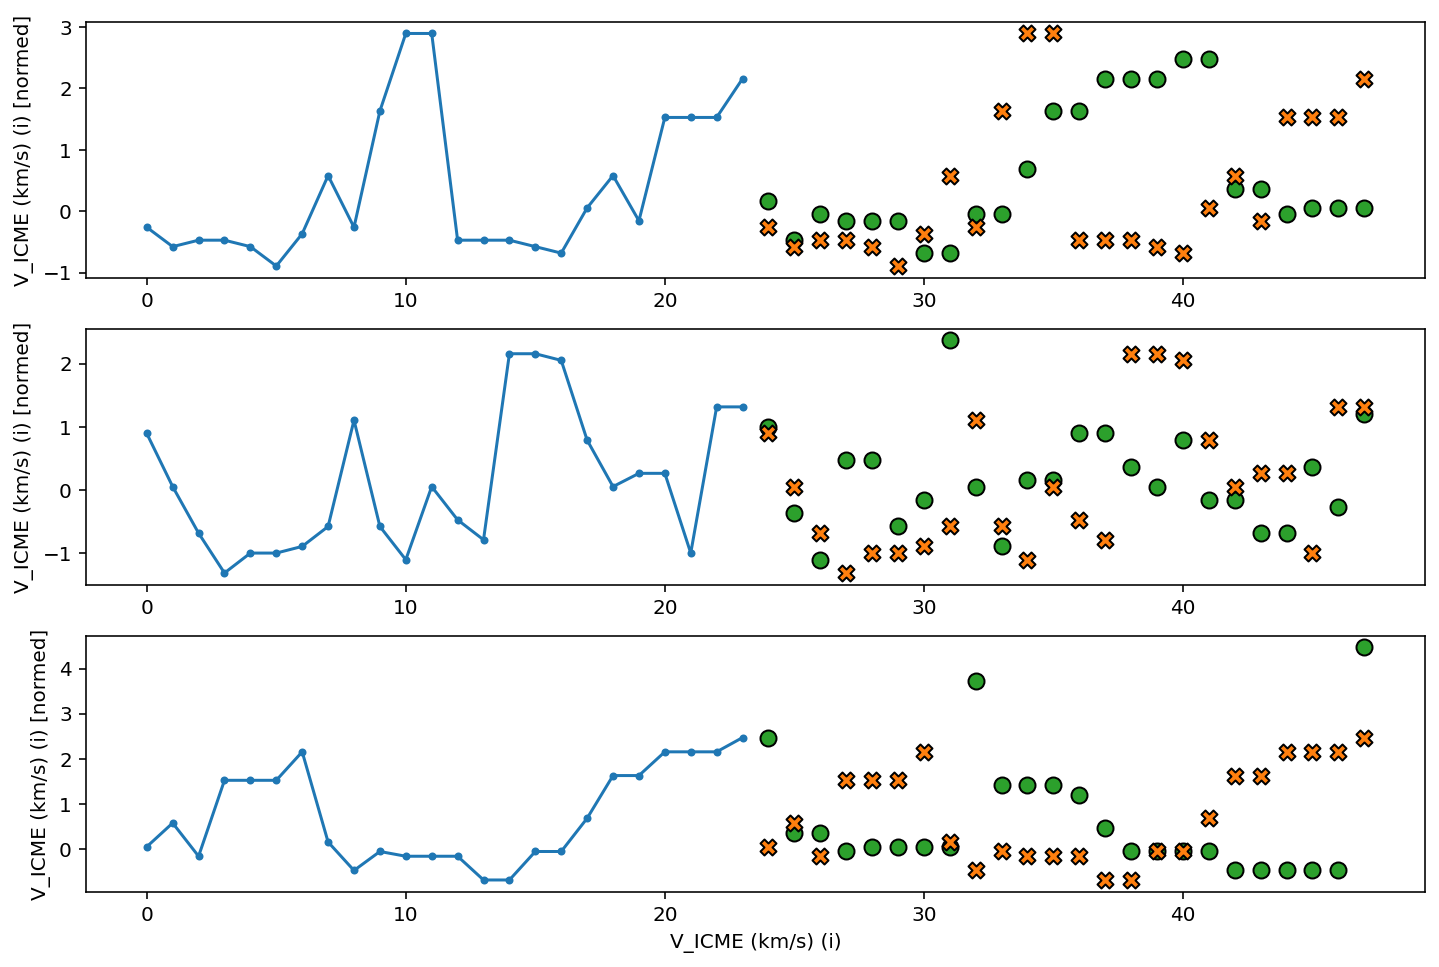

In [209]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

# Single-shot models

## Linear

<p align="left">
  <img width="400" src="../Assets/sing_ln.png" >
</p>

Epoch 1/50
10/10 [==============================] - 0s 15ms/step - loss: 1.0073 - mean_absolute_error: 0.8407 - val_loss: 1.0118 - val_mean_absolute_error: 0.8610
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9998 - mean_absolute_error: 0.8375 - val_loss: 1.0136 - val_mean_absolute_error: 0.8613
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9938 - mean_absolute_error: 0.8349 - val_loss: 1.0161 - val_mean_absolute_error: 0.8618
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9881 - mean_absolute_error: 0.8323 - val_loss: 1.0185 - val_mean_absolute_error: 0.8622
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9834 - mean_absolute_error: 0.8301 - val_loss: 1.0210 - val_mean_absolute_error: 0.8627
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.9793 - mean_absolute_error: 0.8281 - val_loss: 1.0238 - val_mean_absolute_error: 0.8632
Epoch 7/50
10/10 [=========

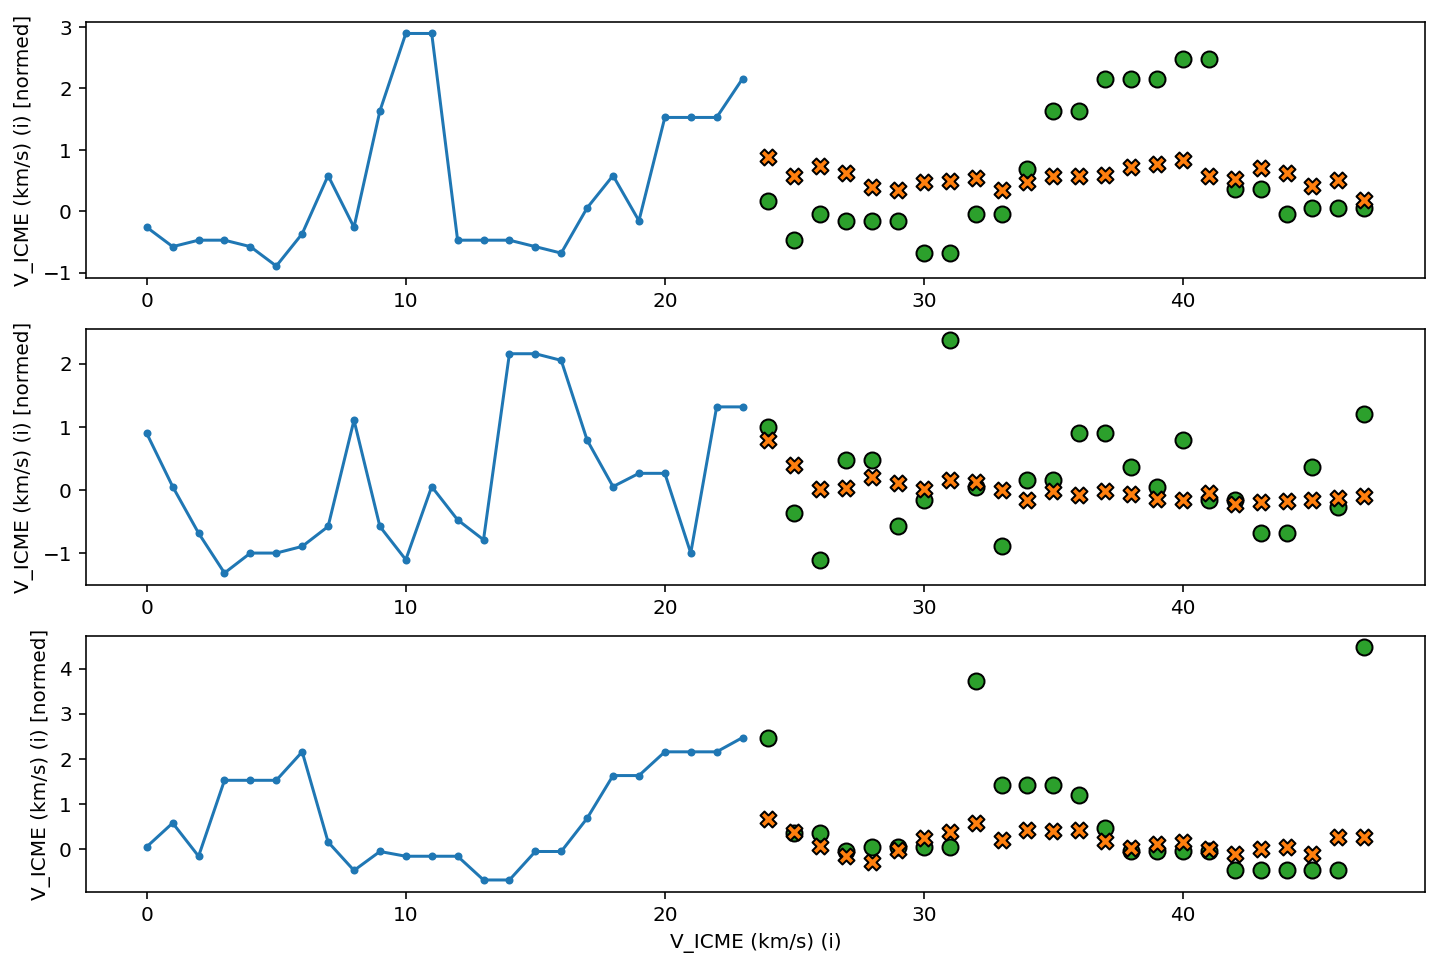

In [210]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

# IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

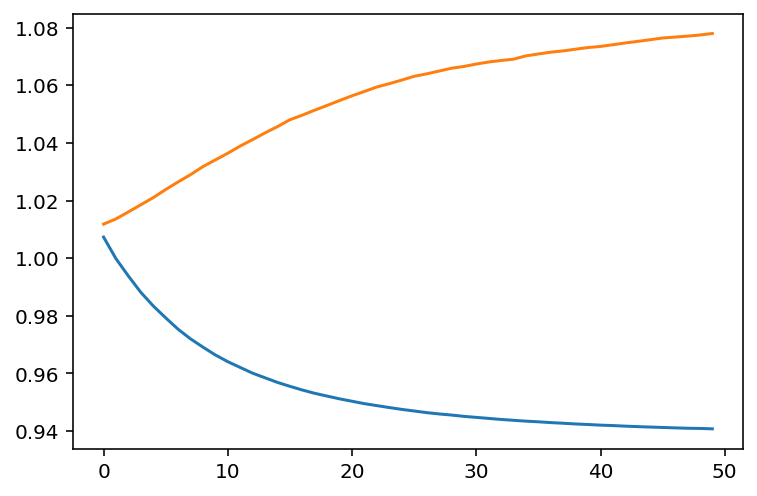

In [211]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Dense

Epoch 1/50
10/10 [==============================] - 1s 18ms/step - loss: 1.0031 - mean_absolute_error: 0.8392 - val_loss: 1.0244 - val_mean_absolute_error: 0.8638
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9670 - mean_absolute_error: 0.8220 - val_loss: 1.0434 - val_mean_absolute_error: 0.8674
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9426 - mean_absolute_error: 0.8077 - val_loss: 1.0628 - val_mean_absolute_error: 0.8727
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9267 - mean_absolute_error: 0.7979 - val_loss: 1.0808 - val_mean_absolute_error: 0.8777
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9150 - mean_absolute_error: 0.7913 - val_loss: 1.0829 - val_mean_absolute_error: 0.8780
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9057 - mean_absolute_error: 0.7856 - val_loss: 1.0870 - val_mean_absolute_error: 0.8781
Epoch 7/50
10/10 [=========

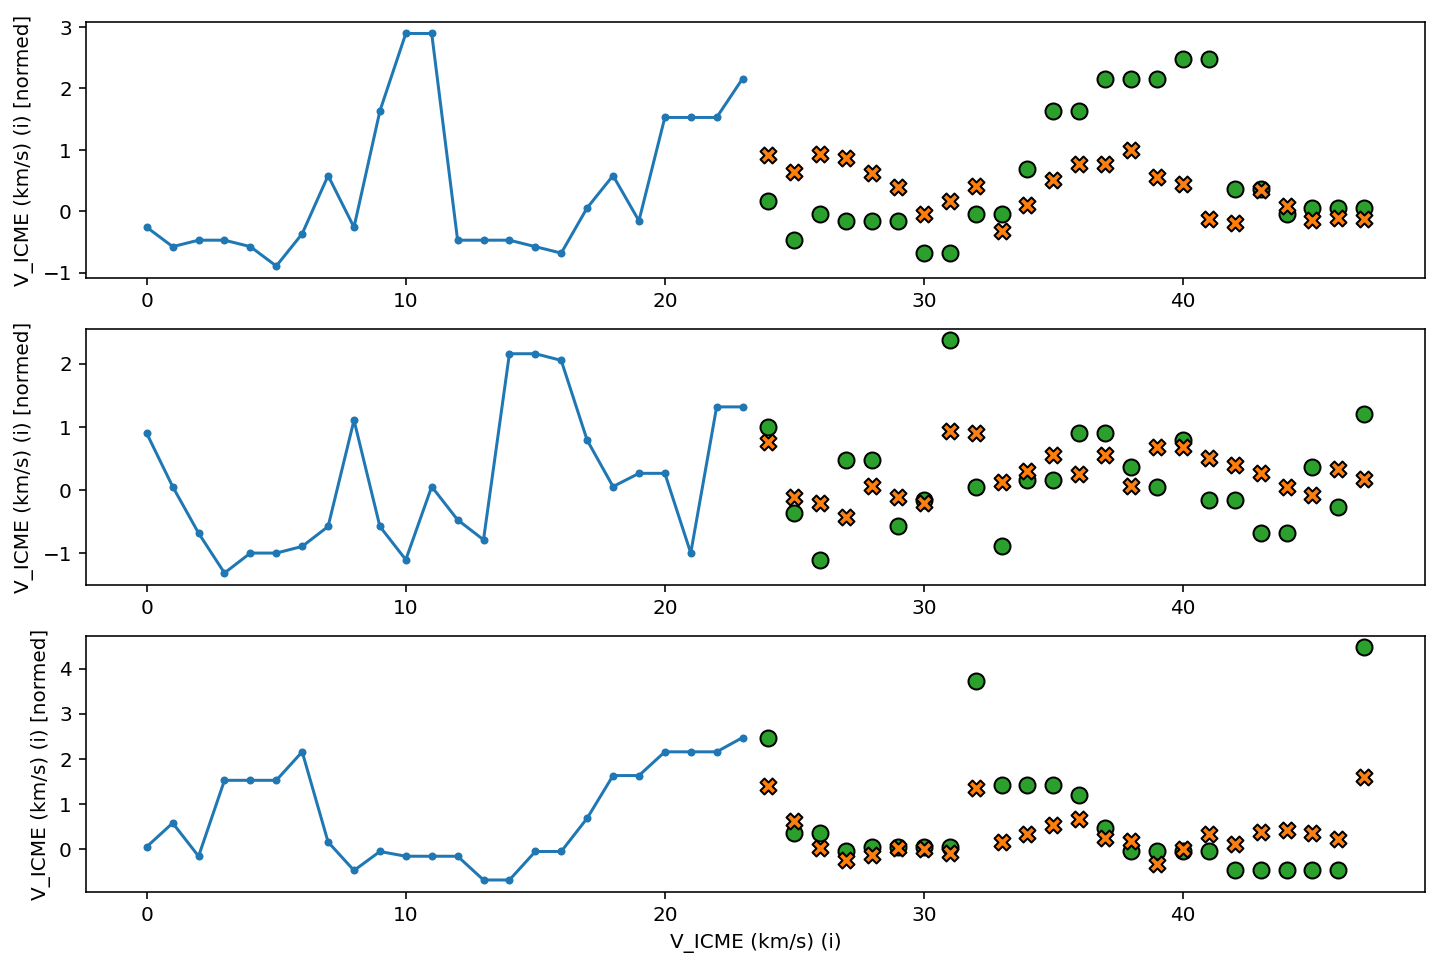

In [212]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

# IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

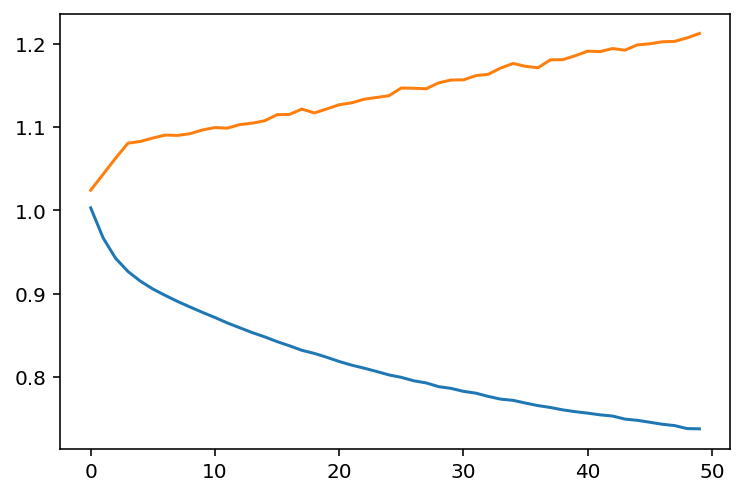

In [213]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN

<p align="left">
  <img width="400" src="../Assets/cnn2.png" >
</p>


Epoch 1/50
10/10 [==============================] - 1s 16ms/step - loss: 1.0046 - mean_absolute_error: 0.8400 - val_loss: 1.0206 - val_mean_absolute_error: 0.8643
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9716 - mean_absolute_error: 0.8245 - val_loss: 1.0415 - val_mean_absolute_error: 0.8693
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9412 - mean_absolute_error: 0.8076 - val_loss: 1.0753 - val_mean_absolute_error: 0.8795
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9192 - mean_absolute_error: 0.7947 - val_loss: 1.1003 - val_mean_absolute_error: 0.8874
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9016 - mean_absolute_error: 0.7854 - val_loss: 1.1064 - val_mean_absolute_error: 0.8894
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8866 - mean_absolute_error: 0.7777 - val_loss: 1.1096 - val_mean_absolute_error: 0.8901
Epoch 7/50
10/10 [=========

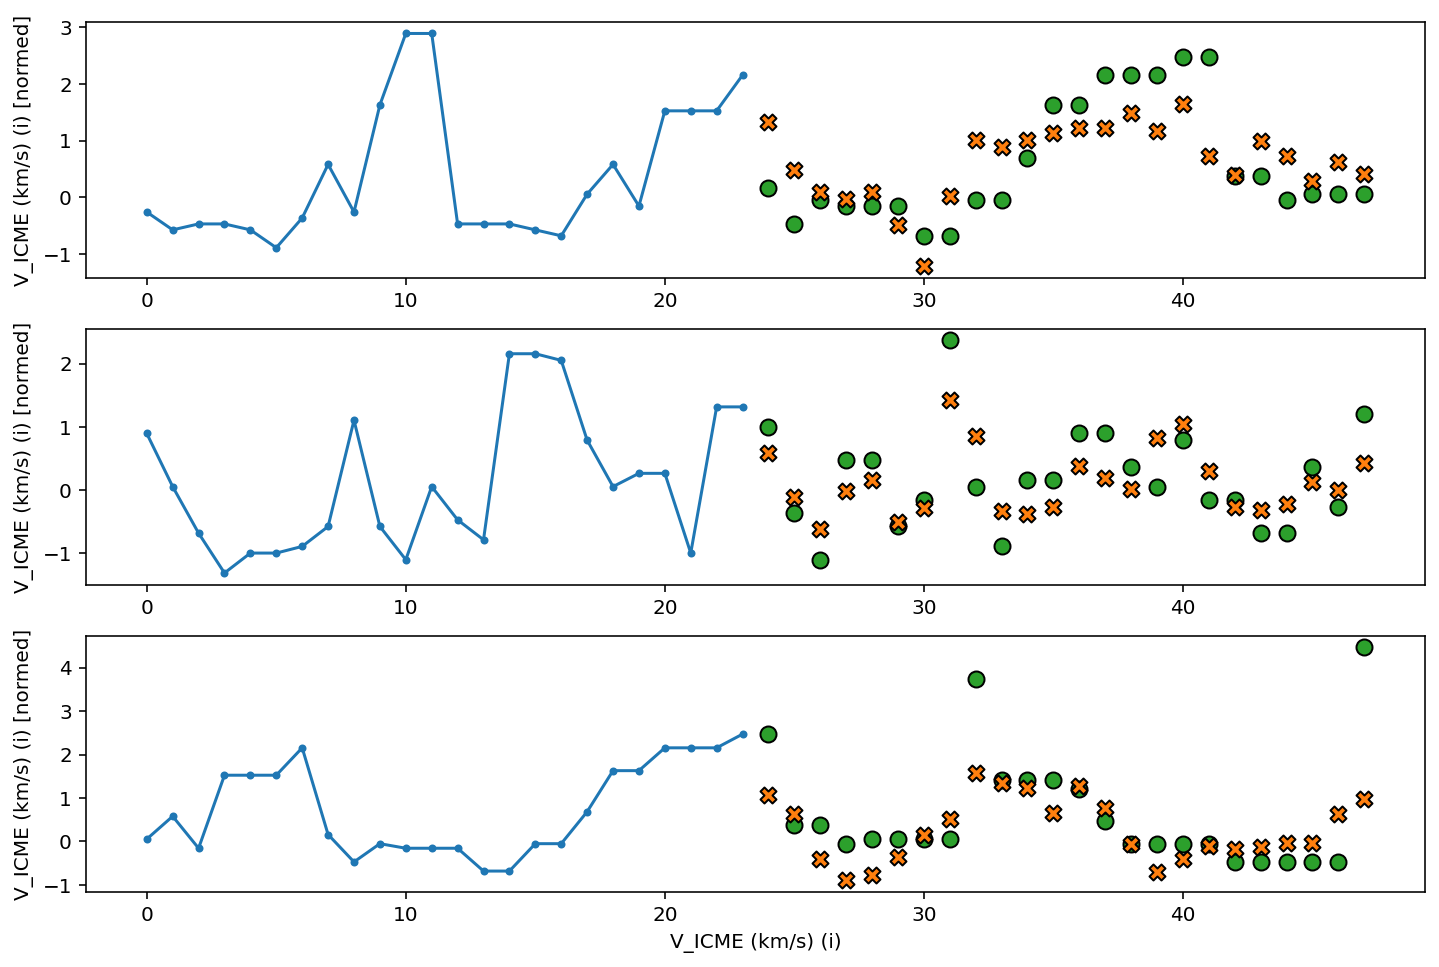

In [214]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

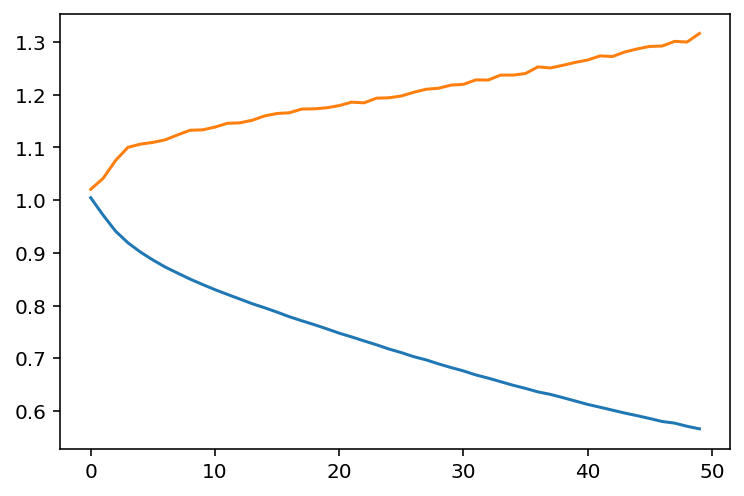

In [215]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## RNN


<p align="left">
  <img width="400" src="../Assets/rnn2.png" >
</p>

Epoch 1/50
10/10 [==============================] - 2s 46ms/step - loss: 1.0069 - mean_absolute_error: 0.8406 - val_loss: 1.0131 - val_mean_absolute_error: 0.8618
Epoch 2/50
10/10 [==============================] - 0s 13ms/step - loss: 0.9971 - mean_absolute_error: 0.8369 - val_loss: 1.0188 - val_mean_absolute_error: 0.8641
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 0.9825 - mean_absolute_error: 0.8314 - val_loss: 1.0285 - val_mean_absolute_error: 0.8677
Epoch 4/50
10/10 [==============================] - 0s 14ms/step - loss: 0.9656 - mean_absolute_error: 0.8247 - val_loss: 1.0392 - val_mean_absolute_error: 0.8718
Epoch 5/50
10/10 [==============================] - 0s 14ms/step - loss: 0.9508 - mean_absolute_error: 0.8178 - val_loss: 1.0482 - val_mean_absolute_error: 0.8748
Epoch 6/50
10/10 [==============================] - 0s 13ms/step - loss: 0.9371 - mean_absolute_error: 0.8100 - val_loss: 1.0544 - val_mean_absolute_error: 0.8769
Epoch 7/50
10/10 [====

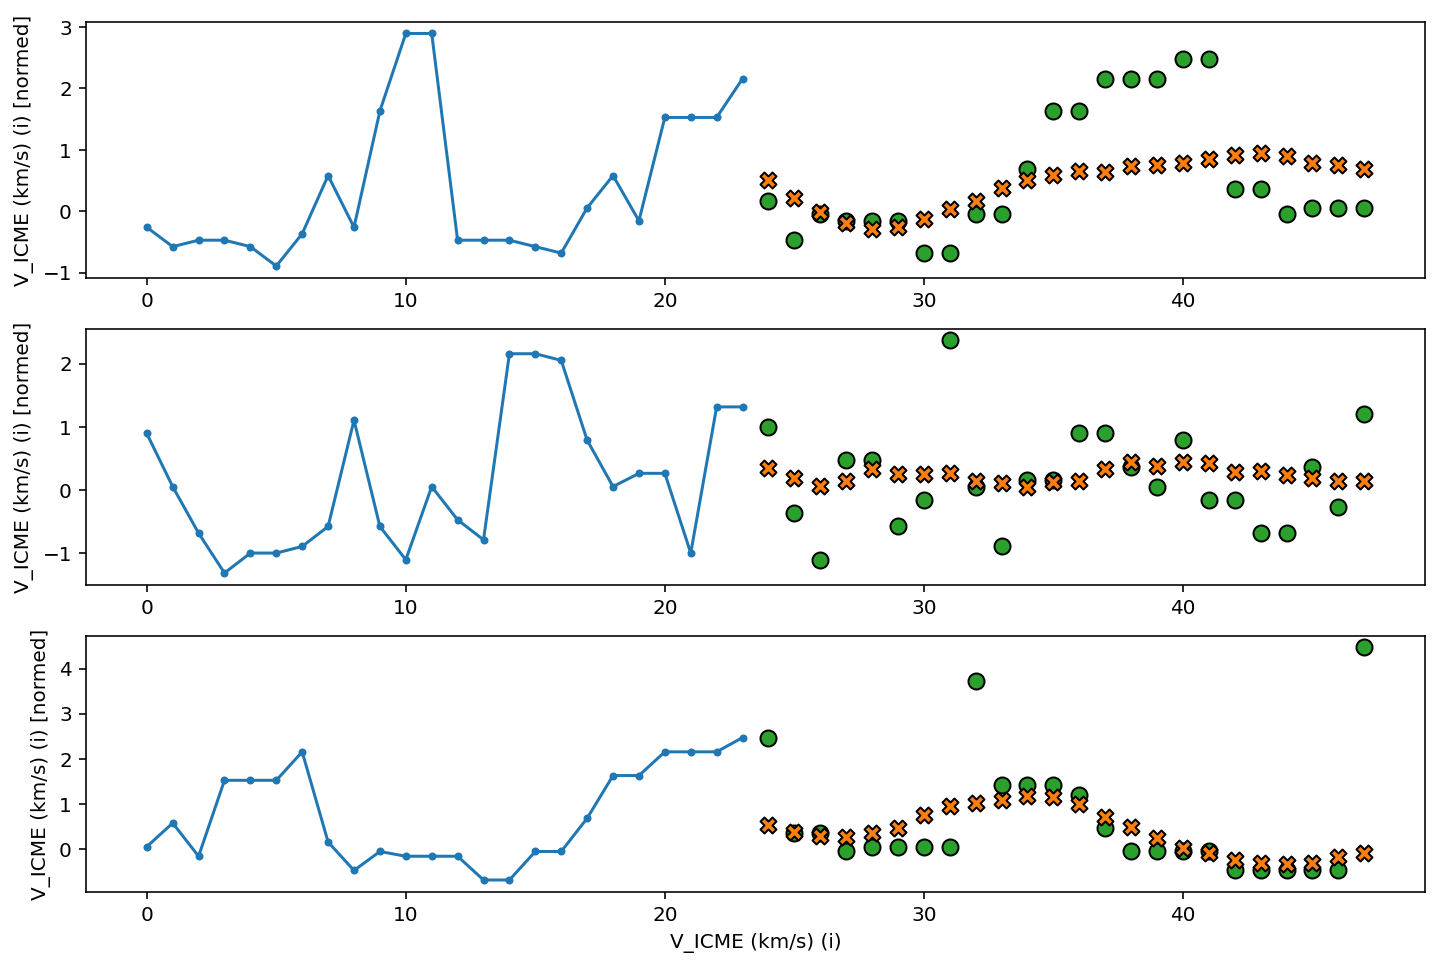

In [216]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

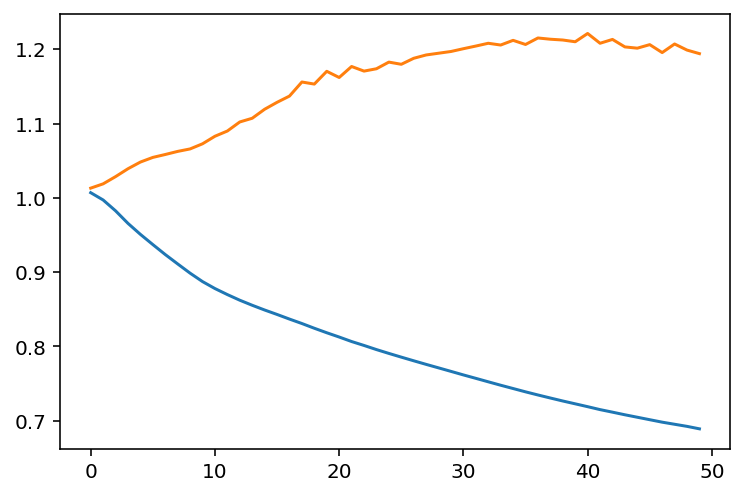

In [217]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Advanced: Autoregressive model




<p align="left">
  <img width="400" src="../Assets/ar.png" >
</p>

## RNN

In [218]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

In [219]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [220]:
def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup

In [221]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 8])

In [222]:
def call(self, inputs, training=None):
    
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the LSTM state.
    prediction, state = self.warmup(inputs)

    # Insert the first prediction.
    predictions.append(prediction)

    # Run the rest of the prediction steps.
    for n in range(1, self.out_steps):
        
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state,
                                  training=training)
        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output.
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

FeedBack.call = call

In [223]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 8)


Epoch 1/50
10/10 [==============================] - 4s 78ms/step - loss: 1.0131 - mean_absolute_error: 0.8411 - val_loss: 1.0169 - val_mean_absolute_error: 0.8640
Epoch 2/50
10/10 [==============================] - 0s 18ms/step - loss: 0.9947 - mean_absolute_error: 0.8341 - val_loss: 1.0295 - val_mean_absolute_error: 0.8691
Epoch 3/50
10/10 [==============================] - 0s 17ms/step - loss: 0.9780 - mean_absolute_error: 0.8291 - val_loss: 1.0342 - val_mean_absolute_error: 0.8694
Epoch 4/50
10/10 [==============================] - 0s 16ms/step - loss: 0.9596 - mean_absolute_error: 0.8205 - val_loss: 1.0554 - val_mean_absolute_error: 0.8736
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 0.9386 - mean_absolute_error: 0.8095 - val_loss: 1.0843 - val_mean_absolute_error: 0.8816
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.9229 - mean_absolute_error: 0.7985 - val_loss: 1.1022 - val_mean_absolute_error: 0.8867
Epoch 7/50
10/10 [====

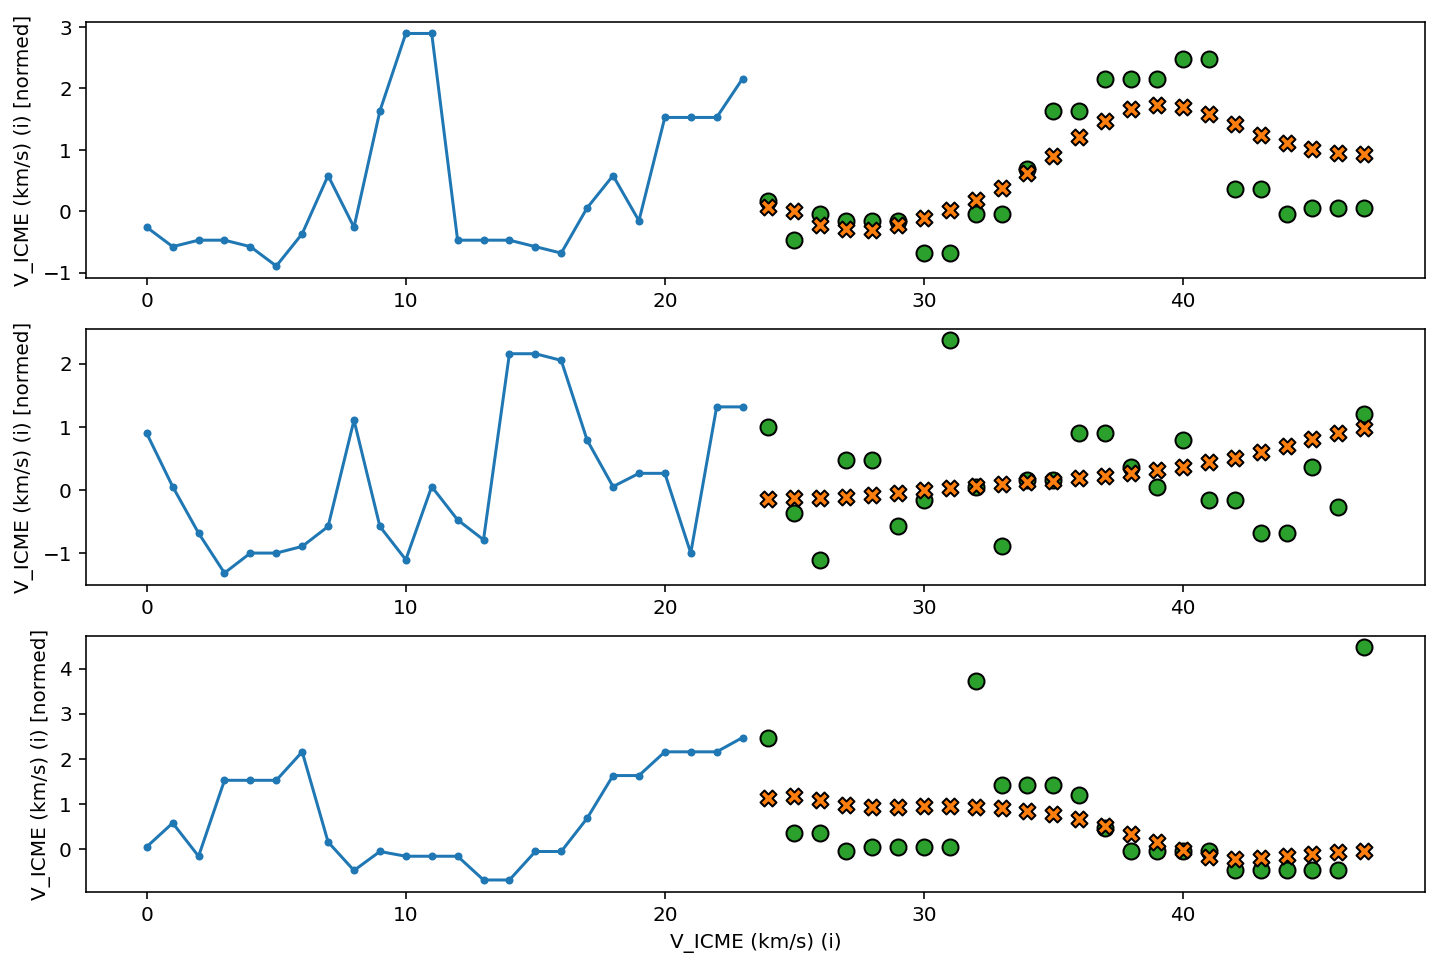

In [224]:
history = compile_and_fit(feedback_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

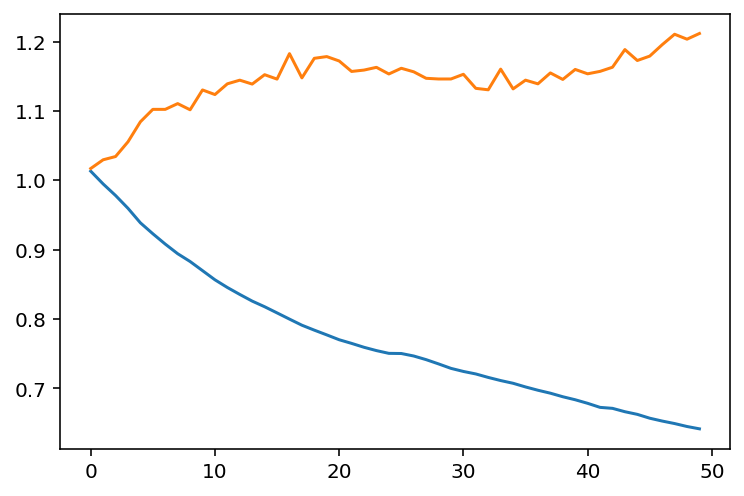

In [225]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

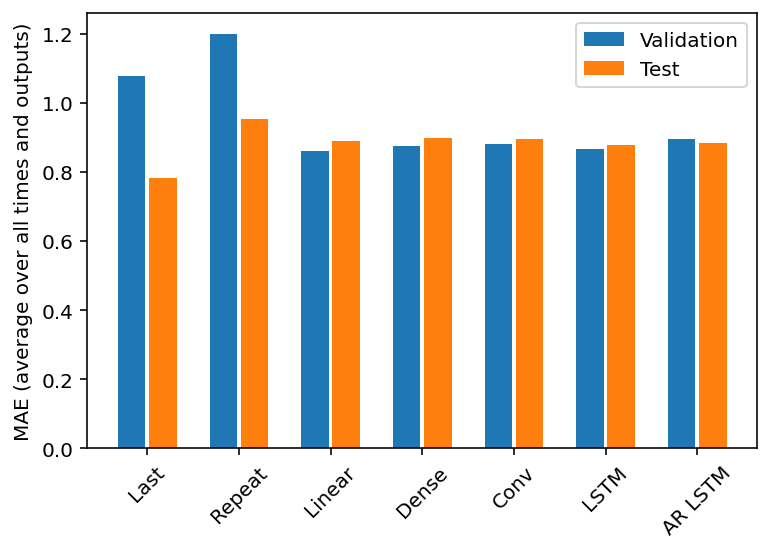

In [111]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()